<a href="https://colab.research.google.com/github/arvind2047/gl_capstone/blob/week4-branch/Capstone_Automatic_Ticket_Assignment_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [13]:
import os
project_path = '/content/drive/My Drive/Capstone Project NLP/' 
os.chdir(project_path) 
os.getcwd()

'/content/drive/My Drive/Capstone Project NLP'

### Load and Uderstand the Data

In [14]:
# read and load data
## Read the data from EXCEL
incidents = pd.read_excel(project_path + "input_data.xlsx")

## Quick View 
incidents.head(3)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0


In [15]:
## basic info
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [16]:
## Shape
incidents.shape

(8500, 4)

In [17]:
incidents.columns

Index(['Short description', 'Description', 'Caller', 'Assignment group'], dtype='object')

In [18]:
incidents["Assignment group"].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [19]:
incidents["Assignment group"].nunique()

74

In [20]:
## find nulls
incidents[incidents.isnull().any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [21]:
## find NA
incidents[incidents.isna().any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [22]:
# drop nulls
incidents.dropna(inplace=True)
incidents.shape

(8491, 4)

In [23]:
## Duplicates 
sub_incidents = incidents[['Short description', 'Description', 'Caller','Assignment group']].copy()
duplicateRowsDF = sub_incidents[sub_incidents.duplicated()]
duplicateRowsDF

,Short description,Description,Caller,Assignment group
51,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
229,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
493,ticket update on inplant_872730,ticket update on inplant_872730,fumkcsji sarmtlhy,GRP_0
512,blank call //gso,blank call //gso,rbozivdq gmlhrtvp,GRP_0
667,job bkbackup_tool_powder_prod_full failed in j...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
...,...,...,...,...
7836,probleme mit erpgui \tmqfjard qzhgdoua,probleme mit erpgui \tmqfjard qzhgdoua,tmqfjard qzhgdoua,GRP_24
8051,issue on pricing in distributor_tool,we have agreed price with many of the distribu...,hbmwlprq ilfvyodx,GRP_21
8093,reset passwords for prgthyuulla ramdntythanjes...,the,boirqctx bkijgqry,GRP_17
8347,blank call // loud noise,blank call // loud noise,rbozivdq gmlhrtvp,GRP_0


In [24]:
# Remove Duplicates
incidents_upd = incidents.drop_duplicates(['Short description', 'Description', 'Caller', 'Assignment group'])

#### Basic cleansing of data

In [25]:
# before removing caller we can see that similar string is present in description, we can clean decription first


incidents_upd['Caller email'] = incidents_upd.apply(lambda x: x['Caller'].replace(' ', '.'), axis=1)
incidents_upd['Caller email'] = incidents_upd.apply(lambda x: x['Caller email'] + '@gmail.com', axis=1)
incidents_upd.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Short description,Description,Caller,Assignment group,Caller email
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,spxjnwir.pjlcoqds@gmail.com
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,hmjdrvpb.komuaywn@gmail.com
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,eylqgodm.ybqkwiam@gmail.com
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,xbkucsvz.gcpydteq@gmail.com
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,owlgqjme.qhcozdfx@gmail.com
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,eflahbxn.ltdgrvkz@gmail.com
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1,jyoqwxhz.clhxsoqy@gmail.com
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0,eqzibjhw.ymebpoih@gmail.com
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,mdbegvct.dbvichlg@gmail.com
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0,fumkcsji.sarmtlhy@gmail.com


In [26]:
incidents_upd['Description']=incidents_upd.apply(lambda x: x['Description'].replace(x['Caller email'], ''), axis=1)
incidents_upd.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Short description,Description,Caller,Assignment group,Caller email
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,spxjnwir.pjlcoqds@gmail.com
1,outlook,"\r\n\r\nreceived from: \r\n\r\nhello team,\r\n...",hmjdrvpb komuaywn,GRP_0,hmjdrvpb.komuaywn@gmail.com
2,cant log in to vpn,\r\n\r\nreceived from: \r\n\r\nhi\r\n\r\ni can...,eylqgodm ybqkwiam,GRP_0,eylqgodm.ybqkwiam@gmail.com
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,xbkucsvz.gcpydteq@gmail.com
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,owlgqjme.qhcozdfx@gmail.com
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,eflahbxn.ltdgrvkz@gmail.com
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1,jyoqwxhz.clhxsoqy@gmail.com
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0,eqzibjhw.ymebpoih@gmail.com
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,mdbegvct.dbvichlg@gmail.com
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0,fumkcsji.sarmtlhy@gmail.com


In [27]:
# Observation :: caller column is useless and can be dropped

incidents_upd = incidents_upd.drop(['Caller'],axis=1)
incidents_upd = incidents_upd.drop(['Caller email'],axis=1)

In [28]:
#remove spaces trailing
incidents_upd['Short description'] = incidents_upd['Short description'].str.strip()
incidents_upd['Description'] = incidents_upd['Description'].str.strip()

#remove tabs and carriage returns
incidents_upd.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=[" "," "], regex=True, inplace=True)

#Getting rid of numbers & special characters etc

spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    incidents_upd['Short description'] = incidents_upd['Description'].str.replace(char, ' ')
    incidents_upd['Description'] = incidents_upd['Description'].str.replace(char, ' ')

#remove numbers    
incidents_upd['Description'] = incidents_upd['Description'].replace('\d+', '', regex=True)
incidents_upd['Short description'] = incidents_upd['Short description'].replace('\d+', '', regex=True)
    
#remove more than 1 space
incidents_upd.replace('\s+', ' ', regex=True, inplace=True)

#make lower case
incidents_upd.apply(lambda x: x.astype(str).str.lower())

incidents_upd.head(10)

,Short description,Description,Assignment group
0,verified user details employee manager name c...,verified user details employee manager name c...,GRP_0
1,received from hello team my meetings skype mee...,received from hello team my meetings skype mee...,GRP_0
2,received from hi i cannot log on to vpn best,received from hi i cannot log on to vpn best,GRP_0
3,unable to access hr tool page,unable to access hr tool page,GRP_0
4,skype error,skype error,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,GRP_0
6,event critical HostName company com the value ...,event critical HostName company com the value ...,GRP_1
7,ticket no employment status new non employee e...,ticket no employment status new non employee e...,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,GRP_0
9,ticket update on inplant,ticket update on inplant,GRP_0


In [21]:
#merge short Description & Description

incidents_upd['isSubstr'] = incidents_upd.apply(lambda x: x['Short description'] not in x['Description'], axis=1)

#Now we see many places short description is redundant. We will append short description to description if True only then drop short descrition
incidents_upd_combined = incidents_upd.copy()
incidents_upd_combined.loc[incidents_upd_combined['isSubstr'] == True, 'Description'] = incidents_upd_combined['Short description'] + " "+ incidents_upd_combined['Description']
#Drop Short description
incidents_upd_combined = incidents_upd_combined.drop(['Short description'],axis=1)
incidents_upd_combined = incidents_upd_combined.drop(['isSubstr'],axis=1)
incidents_upd_combined.tail(10)

,Description,Assignment group
8490,please contact ed pasgryowski pasgryo about hi...,GRP_29
8491,received from i need a vpn for my new laptop n...,GRP_34
8492,hr tool etime option not visitble,GRP_0
8493,i am sorry i have another two accounts that ne...,GRP_10
8494,tablet needs reimaged due to multiple issues w...,GRP_3
8495,received from good afternoon i am not receivin...,GRP_29
8496,telephony software issue,GRP_0
8497,vip windows password reset for tifpdchb pedxruyf,GRP_0
8498,i am unable to access the machine utilities to...,GRP_62
8499,an mehreren pc s lassen sich verschiedene prgr...,GRP_49


In [22]:
## Group by Categories
df_grp = incidents_upd_combined.groupby(['Assignment group']).size().reset_index(name='counts')
df_grp

,Assignment group,counts
0,GRP_0,3926
1,GRP_1,31
2,GRP_10,140
3,GRP_11,30
4,GRP_12,257
...,...,...
69,GRP_71,2
70,GRP_72,2
71,GRP_73,1
72,GRP_8,645


In [23]:
df_grp.describe()

,counts
count,74.000000
mean,113.621622
std,459.823990
min,1.000000
25%,5.250000
50%,26.000000
75%,81.000000
max,3926.000000



**Observation**

* The Target class distrubtion is extremely skewed
* Large no of entries for GRP_0 (mounting to 3926) which account for ~50% of the data
* There are groups with 1 entry also. Need to merge all groups with small entries to a group to reduce the imbalance in the target. This may reduce the imbalance to some extent.

#### Fix the class imbalance

In [24]:
# Observation :: We have 74 categories. There are few categories with very few tickets.
# It might make sense to consider only those categories with atleast 20 representations.
# Else our noise levels will be high
group_frequency = dict(incidents_upd_combined['Assignment group'].value_counts())

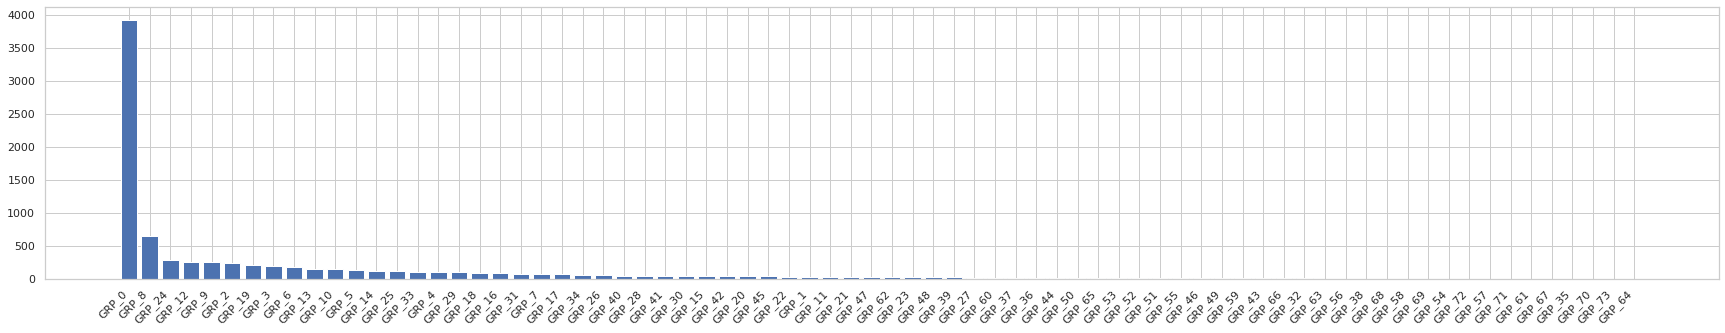

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(30,5))
plt.bar(range(len(group_frequency)), group_frequency.values(), align='center')
plt.xticks(range(len(group_frequency)), list(group_frequency.keys()), rotation=45, ha="right")

plt.show()

In [29]:
print (group_frequency)

{'GRP_0': 3926, 'GRP_8': 645, 'GRP_24': 285, 'GRP_12': 257, 'GRP_9': 252, 'GRP_2': 241, 'GRP_19': 215, 'GRP_3': 200, 'GRP_6': 183, 'GRP_13': 145, 'GRP_10': 140, 'GRP_5': 128, 'GRP_14': 118, 'GRP_25': 116, 'GRP_33': 107, 'GRP_4': 100, 'GRP_29': 97, 'GRP_18': 88, 'GRP_16': 85, 'GRP_31': 69, 'GRP_7': 68, 'GRP_17': 68, 'GRP_34': 61, 'GRP_26': 56, 'GRP_40': 45, 'GRP_28': 44, 'GRP_41': 40, 'GRP_30': 39, 'GRP_15': 38, 'GRP_42': 37, 'GRP_20': 36, 'GRP_45': 35, 'GRP_22': 31, 'GRP_1': 31, 'GRP_11': 30, 'GRP_21': 28, 'GRP_47': 27, 'GRP_62': 25, 'GRP_23': 25, 'GRP_48': 25, 'GRP_39': 19, 'GRP_27': 18, 'GRP_60': 16, 'GRP_37': 16, 'GRP_36': 15, 'GRP_44': 15, 'GRP_50': 14, 'GRP_65': 11, 'GRP_53': 11, 'GRP_52': 9, 'GRP_51': 8, 'GRP_55': 8, 'GRP_46': 6, 'GRP_49': 6, 'GRP_59': 6, 'GRP_43': 5, 'GRP_66': 4, 'GRP_32': 4, 'GRP_63': 3, 'GRP_56': 3, 'GRP_38': 3, 'GRP_68': 3, 'GRP_58': 3, 'GRP_69': 2, 'GRP_54': 2, 'GRP_72': 2, 'GRP_57': 2, 'GRP_71': 2, 'GRP_61': 1, 'GRP_67': 1, 'GRP_35': 1, 'GRP_70': 1, 'GRP_73

In [30]:
group_df = pd.DataFrame.from_dict(group_frequency, orient='index', columns=['frequency'])
group_df.head(10)

,frequency
GRP_0,3926
GRP_8,645
GRP_24,285
GRP_12,257
GRP_9,252
GRP_2,241
GRP_19,215
GRP_3,200
GRP_6,183
GRP_13,145


In [31]:
group_df.tail(10)

,frequency
GRP_54,2
GRP_72,2
GRP_57,2
GRP_71,2
GRP_61,1
GRP_67,1
GRP_35,1
GRP_70,1
GRP_73,1
GRP_64,1


In [32]:
#lets get the stats of this 
group_df.describe(percentiles=[0.1, .25, .5, .75, .95, .99]).transpose()

,count,mean,std,min,10%,25%,50%,75%,95%,99%,max
frequency,74.0,113.621622,459.82399,1.0,2.0,5.25,26.0,81.0,253.75,1530.87,3926.0


In [33]:
group_df['percent representation'] = group_df['frequency'] / group_df['frequency'].sum()
group_df.head(10)

,frequency,percent representation
GRP_0,3926,0.466936
GRP_8,645,0.076713
GRP_24,285,0.033896
GRP_12,257,0.030566
GRP_9,252,0.029971
GRP_2,241,0.028663
GRP_19,215,0.025571
GRP_3,200,0.023787
GRP_6,183,0.021765
GRP_13,145,0.017245


In [34]:
group_df['cumulative percentage'] = group_df['percent representation'].cumsum(axis = 0)
group_df.head(35)

,frequency,percent representation,cumulative percentage
GRP_0,3926,0.466936,0.466936
GRP_8,645,0.076713,0.543649
GRP_24,285,0.033896,0.577545
GRP_12,257,0.030566,0.608111
GRP_9,252,0.029971,0.638083
GRP_2,241,0.028663,0.666746
GRP_19,215,0.025571,0.692317
GRP_3,200,0.023787,0.716104
GRP_6,183,0.021765,0.737869
GRP_13,145,0.017245,0.755114


**Observation:** 95 percentile is achieved at a frequency of 31.

In [35]:
inv_group_frequency = {}
for k, v in group_frequency.items():
    inv_group_frequency[v] = inv_group_frequency.get(v, [])
    inv_group_frequency[v].append(k)

In [36]:
inv_group_df = pd.DataFrame.from_dict(inv_group_frequency, orient='index', columns=['group1', 'group2', 'group3', 'group4', 'group5', 'group6'])
inv_group_df.tail(10)

,group1,group2,group3,group4,group5,group6
14,GRP_50,None,None,None,None,None
11,GRP_65,GRP_53,None,None,None,None
9,GRP_52,None,None,None,None,None
8,GRP_51,GRP_55,None,None,None,None
6,GRP_46,GRP_49,GRP_59,None,None,None
5,GRP_43,None,None,None,None,None
4,GRP_66,GRP_32,None,None,None,None
3,GRP_63,GRP_56,GRP_38,GRP_68,GRP_58,None
2,GRP_69,GRP_54,GRP_72,GRP_57,GRP_71,None
1,GRP_61,GRP_67,GRP_35,GRP_70,GRP_73,GRP_64


In [37]:
for key, value in inv_group_frequency.items():
    #print value
    print(key, len(value))

3926 1
645 1
285 1
257 1
252 1
241 1
215 1
200 1
183 1
145 1
140 1
128 1
118 1
116 1
107 1
100 1
97 1
88 1
85 1
69 1
68 2
61 1
56 1
45 1
44 1
40 1
39 1
38 1
37 1
36 1
35 1
31 2
30 1
28 1
27 1
25 3
19 1
18 1
16 2
15 2
14 1
11 2
9 1
8 2
6 3
5 1
4 2
3 5
2 5
1 6


In [38]:
#eliminate groups that have very less representation, that is we consider 95% significant data
group_elimination_treshold = 31

In [39]:
group_frequency_filtered = dict(filter(lambda x: x[1] >= group_elimination_treshold, group_frequency.items()))

In [40]:
#Lets now filter the data frame and retain only the necessary groups(Filtered)
valid_grp_list = list(group_frequency_filtered)

In [41]:
#eliminate
incidents_filtered = incidents_upd_combined[incidents_upd_combined['Assignment group'].isin(valid_grp_list)]
incidents_filtered.head(10)

,Description,Assignment group
0,verified user details employee manager name c...,GRP_0
1,received from hello team my meetings skype mee...,GRP_0
2,received from hi i cannot log on to vpn best,GRP_0
3,unable to access hr tool page,GRP_0
4,skype error,GRP_0
5,unable to log in to engineering tool and skype,GRP_0
6,event critical HostName company com the value ...,GRP_1
7,ticket no employment status new non employee e...,GRP_0
8,unable to disable add ins on outlook,GRP_0
9,ticket update on inplant,GRP_0


In [42]:
incidents_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8026 entries, 0 to 8497
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Description       8026 non-null   object
 1   Assignment group  8026 non-null   object
dtypes: object(2)
memory usage: 188.1+ KB


In [43]:
incidents_filtered.describe()

,Description,Assignment group
count,8026,8026
unique,6376,34
top,received from monitoring tool company com job ...,GRP_0
freq,412,3926


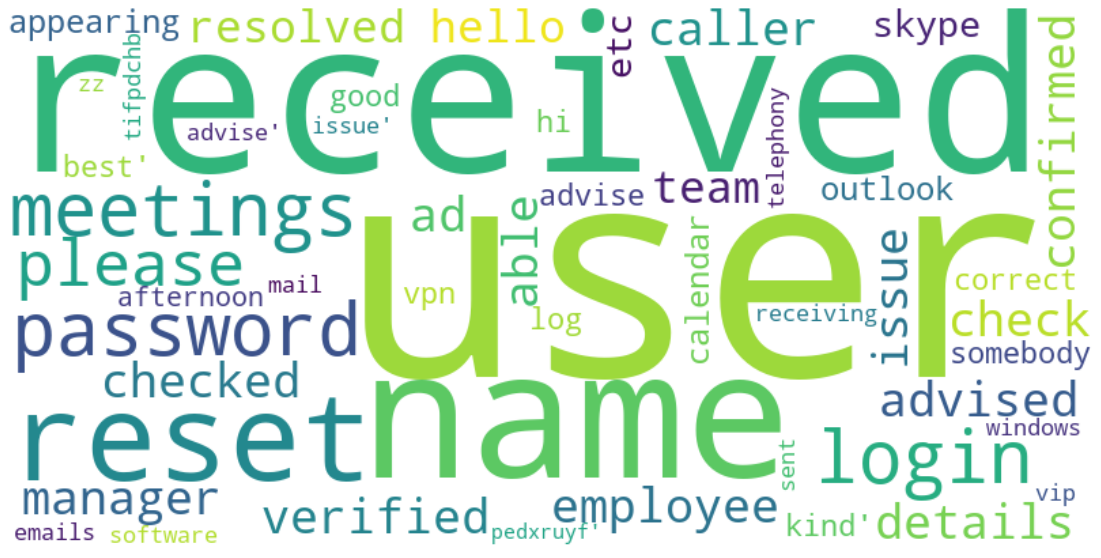

In [44]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#word cloud for overall data
stopwords = STOPWORDS

wordcloud = WordCloud(stopwords = stopwords, max_words=500, background_color="white",width=800, height=400).generate(str(incidents_filtered['Description'].values))

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

### Text Pre-processing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


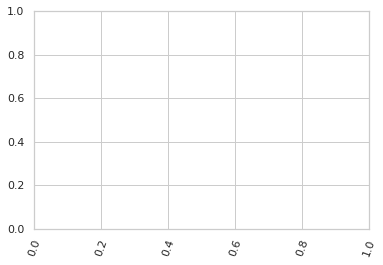

In [45]:
import nltk
import string
from nltk import FreqDist
nltk.download('stopwords') 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

In [46]:
!pip install fasttext
!pip install contractions
!pip install langdetect
!pip install googletrans

     |████████████████████████████████| 71kB 2.3MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3016595 sha256=4ef80a236a9d2a028fa48b2911b6bd0ea047ad1ba440ebb2f911cb1ea700e014
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext
     |████████████████████████████████| 317kB 4.4MB/s 
     |████████████████████████████████| 245kB 24.4MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81697 sha256=b1712af704603b357c078b481834bfa539200d27401618a6a733a29287cf939d
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick
     |████████████████████████████████| 983kB 3.3MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=9667473d1ab072847143c2f9216bcacff9eccd040ae1f2cb814e63cff118ac72
  S

In [47]:
import contractions
import fasttext
from langdetect import detect
import googletrans
from googletrans import Translator
from collections import Counter

In [48]:
!pip install gensim
!pip install bs4
!pip install pyLDAvis
!pip install warnings

     |████████████████████████████████| 1.6MB 3.2MB/s 
     |████████████████████████████████| 552kB 21.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=862abfa5425c5bf55bc21defdb9e828caa9a63bfedc78ef6a7b6b2efb984af2e
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=945bd502410cfa13e742e8402da02ca85bb96cd0949c7f323c93e91f181d8f9a
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy
ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


#### Get the frequency of words in Description Column

In [49]:
# function to plot most frequent terms. This is used to gauge the quality of text processing
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top n most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

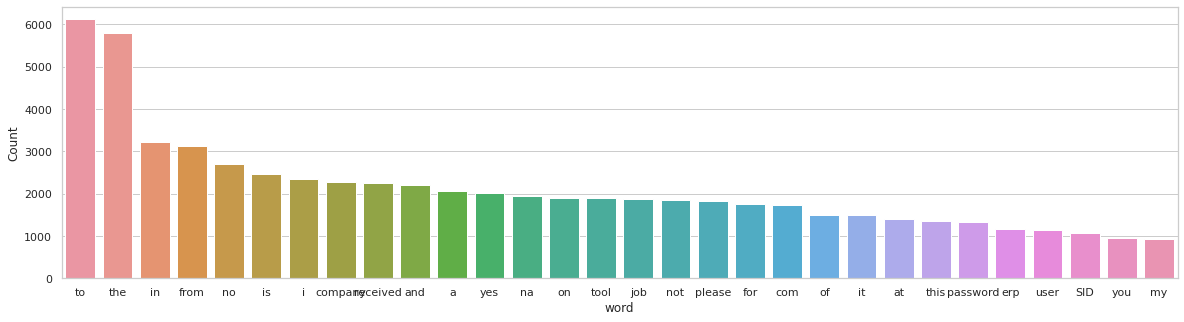

In [51]:
freq_words(list(incidents_filtered['Description']))

#### Expand the contractions

In [ ]:
'''
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the description
incidents_upd['Description']=incidents_upd['Description'].apply(lambda x:expand_contractions(x))
'''

In [ ]:
'''
# Expanding Contractions in the short description
incidents_upd['Short description']=incidents_upd['Short description'].apply(lambda x:expand_contractions(x))
'''

In [ ]:
'''
incidents_upd.head(5)
'''

In [56]:
incidents_upd_combined = incidents_filtered.copy()

In [57]:
incidents_upd_combined['Description_Expanded'] = incidents_upd_combined['Description'].apply(lambda x: [contractions.fix(word) for word in x.split()])

#Convert the expanded column to string
incidents_upd_combined['Description_Expanded_Str'] = [' '.join(map(str, l)) for l in incidents_upd_combined['Description_Expanded']]
incidents_upd_combined.head()

,Description,Assignment group,Description_Expanded,Description_Expanded_Str
0,verified user details employee manager name checked the user name in ad and reset the password ...,GRP_0,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...",verified user details employee manager name checked the user name in ad and reset the password a...
1,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,GRP_0,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...",received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...
2,received from hi i cannot log on to vpn best,GRP_0,"[received, from, hi, i, cannot, log, on, to, vpn, best]",received from hi i cannot log on to vpn best
3,unable to access hr tool page,GRP_0,"[unable, to, access, hr, tool, page]",unable to access hr tool page
4,skype error,GRP_0,"[skype, error]",skype error


#### English Language Detection

In [58]:
pretrained_model = project_path + "lid.176.bin" 
model = fasttext.load_model(pretrained_model)
langs = []
for sent in incidents_upd_combined['Description_Expanded_Str']:
    lang = model.predict(sent)[0]
    langs.append(str(lang)[11:13])
incidents_upd_combined['langs'] = langs

incidents_upd_combined.head(10)

,Description,Assignment group,Description_Expanded,Description_Expanded_Str,langs
0,verified user details employee manager name checked the user name in ad and reset the password ...,GRP_0,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...",verified user details employee manager name checked the user name in ad and reset the password a...,en
1,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,GRP_0,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...",received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,en
2,received from hi i cannot log on to vpn best,GRP_0,"[received, from, hi, i, cannot, log, on, to, vpn, best]",received from hi i cannot log on to vpn best,en
3,unable to access hr tool page,GRP_0,"[unable, to, access, hr, tool, page]",unable to access hr tool page,en
4,skype error,GRP_0,"[skype, error]",skype error,ja
5,unable to log in to engineering tool and skype,GRP_0,"[unable, to, log, in, to, engineering, tool, and, skype]",unable to log in to engineering tool and skype,en
6,event critical HostName company com the value of mountpoint threshold for oracle SID erpdata srp...,GRP_1,"[event, critical, HostName, company, com, the, value, of, mountpoint, threshold, for, oracle, SI...",event critical HostName company com the value of mountpoint threshold for oracle SID erpdata srp...,en
7,ticket no employment status new non employee enter user s name,GRP_0,"[ticket, no, employment, status, new, non, employee, enter, user, s, name]",ticket no employment status new non employee enter user s name,en
8,unable to disable add ins on outlook,GRP_0,"[unable, to, disable, add, ins, on, outlook]",unable to disable add ins on outlook,en
9,ticket update on inplant,GRP_0,"[ticket, update, on, inplant]",ticket update on inplant,en


#### Translate non-English to English

In [59]:
#checking detected languages
x=incidents_upd_combined['langs'].value_counts()

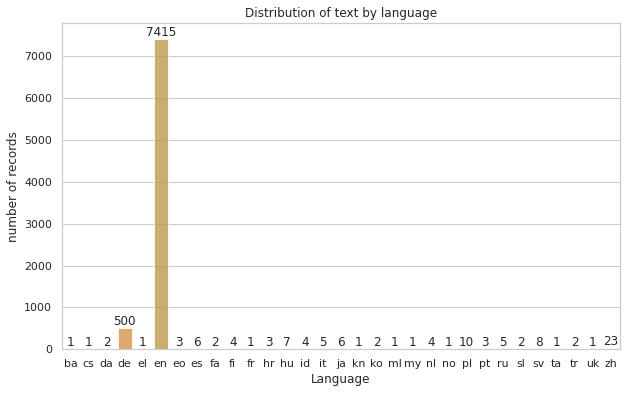

In [60]:
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

In [62]:
translator = Translator()

desc_trans=[]

for sentence in incidents_upd_combined['Description_Expanded_Str']:
  try:
    trans = translator.translate(sentence).text if language != 'en' else sentence
  except:
    language = "error"
    print("This row throws an error:", sentence)
  desc_trans.append(trans)

incidents_upd_en = incidents_upd_combined.copy()
incidents_upd_en['Translated_Description']=desc_trans
print(incidents_upd_en)
#incidents_upd_en.drop('langs', inplace = True, axis=1)

                                                                                              Description  ...                                                                               Translated_Description
0      verified user details employee manager name checked the user name in ad and reset the password ...  ...  verified user details employee manager name checked the user name in ad and reset the password a...
1     received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...  ...  received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...
2                                                            received from hi i cannot log on to vpn best  ...                                                         received from hi i cannot log on to vpn best
3                                                                           unable to access hr tool page  ...                                          

#### Remove non-English details

In [ ]:
#incidents_upd_en = incidents_upd_combined[incidents_upd_combined.langs.eq('en')]
#print(incidents_upd_en)

In [ ]:
#incidents_upd_en.drop('langs', inplace = True, axis=1)
#incidents_upd_en.head()

#### Tokenization

In [63]:
# Package needed for tokenization
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [103]:
incidents_upd_en['tokenized'] = incidents_upd_en['Translated_Description'].apply(word_tokenize)
incidents_upd_en.head()

,Description,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,desc_len,desc_word_cnt
0,verified user details employee manager name checked the user name in ad and reset the password ...,GRP_0,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...",verified user details employee manager name checked the user name in ad and reset the password a...,en,verified user details employee manager name checked the user name in ad and reset the password a...,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, user, name, ad, reset, password, adv...","[(verified, VBN), (user, NN), (details, NNS), (employee, NN), (manager, NN), (name, NN), (checke...","[(verified, v), (user, n), (details, n), (employee, n), (manager, n), (name, n), (checked, v), (...","[verify, user, detail, employee, manager, name, check, user, name, ad, reset, password, advise, ...",verify user detail employee manager name check user name ad reset password advise user login che...,138,22
1,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,GRP_0,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...",received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,en,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, hello, team, meetings, skype, meetings, etc, appearing, outlook, calendar, somebody, ...","[(received, VBN), (hello, JJ), (team, NN), (meetings, NNS), (skype, JJ), (meetings, NNS), (etc, ...","[(received, v), (hello, a), (team, n), (meetings, n), (skype, a), (meetings, n), (etc, v), (appe...","[receive, hello, team, meeting, skype, meeting, etc, appear, outlook, calendar, somebody, please...",receive hello team meeting skype meeting etc appear outlook calendar somebody please advise corr...,104,15
2,received from hi i cannot log on to vpn best,GRP_0,"[received, from, hi, i, cannot, log, on, to, vpn, best]",received from hi i cannot log on to vpn best,en,received from hi i cannot log on to vpn best,"[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, hi, log, vpn, best]","[(received, VBN), (hi, JJ), (log, NN), (vpn, NN), (best, JJS)]","[(received, v), (hi, a), (log, n), (vpn, n), (best, a)]","[receive, hi, log, vpn, best]",receive hi log vpn best,23,5
3,unable to access hr tool page,GRP_0,"[unable, to, access, hr, tool, page]",unable to access hr tool page,en,unable to access hr tool page,"[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, access, hr, tool, page]","[(unable, JJ), (access, NN), (hr, NN), (tool, NN), (page, NN)]","[(unable, a), (access, n), (hr, n), (tool, n), (page, n)]","[unable, access, hr, tool, page]",unable access hr tool page,26,5
4,skype error,GRP_0,"[skype, error]",skype error,ja,skype error,"[skype, error]","[skype, error]","[skype, error]","[skype, error]","[(skype, NN), (error, NN)]","[(skype, n), (error, n)]","[skype, error]",skype error,11,2


#### Converting all Characters to Lowercase

In [104]:
incidents_upd_en['lower'] = incidents_upd_en['tokenized'].apply(lambda x: [word.lower() for word in x])
incidents_upd_en.head()

,Description,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,desc_len,desc_word_cnt
0,verified user details employee manager name checked the user name in ad and reset the password ...,GRP_0,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...",verified user details employee manager name checked the user name in ad and reset the password a...,en,verified user details employee manager name checked the user name in ad and reset the password a...,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, user, name, ad, reset, password, adv...","[(verified, VBN), (user, NN), (details, NNS), (employee, NN), (manager, NN), (name, NN), (checke...","[(verified, v), (user, n), (details, n), (employee, n), (manager, n), (name, n), (checked, v), (...","[verify, user, detail, employee, manager, name, check, user, name, ad, reset, password, advise, ...",verify user detail employee manager name check user name ad reset password advise user login che...,138,22
1,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,GRP_0,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...",received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,en,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, hello, team, meetings, skype, meetings, etc, appearing, outlook, calendar, somebody, ...","[(received, VBN), (hello, JJ), (team, NN), (meetings, NNS), (skype, JJ), (meetings, NNS), (etc, ...","[(received, v), (hello, a), (team, n), (meetings, n), (skype, a), (meetings, n), (etc, v), (appe...","[receive, hello, team, meeting, skype, meeting, etc, appear, outlook, calendar, somebody, please...",receive hello team meeting skype meeting etc appear outlook calendar somebody please advise corr...,104,15
2,received from hi i cannot log on to vpn best,GRP_0,"[received, from, hi, i, cannot, log, on, to, vpn, best]",received from hi i cannot log on to vpn best,en,received from hi i cannot log on to vpn best,"[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, hi, log, vpn, best]","[(received, VBN), (hi, JJ), (log, NN), (vpn, NN), (best, JJS)]","[(received, v), (hi, a), (log, n), (vpn, n), (best, a)]","[receive, hi, log, vpn, best]",receive hi log vpn best,23,5
3,unable to access hr tool page,GRP_0,"[unable, to, access, hr, tool, page]",unable to access hr tool page,en,unable to access hr tool page,"[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, access, hr, tool, page]","[(unable, JJ), (access, NN), (hr, NN), (tool, NN), (page, NN)]","[(unable, a), (access, n), (hr, n), (tool, n), (page, n)]","[unable, access, hr, tool, page]",unable access hr tool page,26,5
4,skype error,GRP_0,"[skype, error]",skype error,ja,skype error,"[skype, error]","[skype, error]","[skype, error]","[skype, error]","[(skype, NN), (error, NN)]","[(skype, n), (error, n)]","[skype, error]",skype error,11,2


#### Removing Punctuations

In [105]:
punc = string.punctuation
incidents_upd_en['no_punc'] = incidents_upd_en['lower'].apply(lambda x: [word for word in x if word not in punc])
incidents_upd_en.head()

,Description,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,desc_len,desc_word_cnt
0,verified user details employee manager name checked the user name in ad and reset the password ...,GRP_0,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...",verified user details employee manager name checked the user name in ad and reset the password a...,en,verified user details employee manager name checked the user name in ad and reset the password a...,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, user, name, ad, reset, password, adv...","[(verified, VBN), (user, NN), (details, NNS), (employee, NN), (manager, NN), (name, NN), (checke...","[(verified, v), (user, n), (details, n), (employee, n), (manager, n), (name, n), (checked, v), (...","[verify, user, detail, employee, manager, name, check, user, name, ad, reset, password, advise, ...",verify user detail employee manager name check user name ad reset password advise user login che...,138,22
1,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,GRP_0,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...",received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,en,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, hello, team, meetings, skype, meetings, etc, appearing, outlook, calendar, somebody, ...","[(received, VBN), (hello, JJ), (team, NN), (meetings, NNS), (skype, JJ), (meetings, NNS), (etc, ...","[(received, v), (hello, a), (team, n), (meetings, n), (skype, a), (meetings, n), (etc, v), (appe...","[receive, hello, team, meeting, skype, meeting, etc, appear, outlook, calendar, somebody, please...",receive hello team meeting skype meeting etc appear outlook calendar somebody please advise corr...,104,15
2,received from hi i cannot log on to vpn best,GRP_0,"[received, from, hi, i, cannot, log, on, to, vpn, best]",received from hi i cannot log on to vpn best,en,received from hi i cannot log on to vpn best,"[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, hi, log, vpn, best]","[(received, VBN), (hi, JJ), (log, NN), (vpn, NN), (best, JJS)]","[(received, v), (hi, a), (log, n), (vpn, n), (best, a)]","[receive, hi, log, vpn, best]",receive hi log vpn best,23,5
3,unable to access hr tool page,GRP_0,"[unable, to, access, hr, tool, page]",unable to access hr tool page,en,unable to access hr tool page,"[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, access, hr, tool, page]","[(unable, JJ), (access, NN), (hr, NN), (tool, NN), (page, NN)]","[(unable, a), (access, n), (hr, n), (tool, n), (page, n)]","[unable, access, hr, tool, page]",unable access hr tool page,26,5
4,skype error,GRP_0,"[skype, error]",skype error,ja,skype error,"[skype, error]","[skype, error]","[skype, error]","[skype, error]","[(skype, NN), (error, NN)]","[(skype, n), (error, n)]","[skype, error]",skype error,11,2


#### Removing Stopwords

In [106]:
stop_words = set(stopwords.words('english'))
incidents_upd_en['stopwords_removed'] = incidents_upd_en['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
incidents_upd_en.head()

,Description,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,desc_len,desc_word_cnt
0,verified user details employee manager name checked the user name in ad and reset the password ...,GRP_0,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...",verified user details employee manager name checked the user name in ad and reset the password a...,en,verified user details employee manager name checked the user name in ad and reset the password a...,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, user, name, ad, reset, password, adv...","[(verified, VBN), (user, NN), (details, NNS), (employee, NN), (manager, NN), (name, NN), (checke...","[(verified, v), (user, n), (details, n), (employee, n), (manager, n), (name, n), (checked, v), (...","[verify, user, detail, employee, manager, name, check, user, name, ad, reset, password, advise, ...",verify user detail employee manager name check user name ad reset password advise user login che...,138,22
1,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,GRP_0,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...",received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,en,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, hello, team, meetings, skype, meetings, etc, appearing, outlook, calendar, somebody, ...","[(received, VBN), (hello, JJ), (team, NN), (meetings, NNS), (skype, JJ), (meetings, NNS), (etc, ...","[(received, v), (hello, a), (team, n), (meetings, n), (skype, a), (meetings, n), (etc, v), (appe...","[receive, hello, team, meeting, skype, meeting, etc, appear, outlook, calendar, somebody, please...",receive hello team meeting skype meeting etc appear outlook calendar somebody please advise corr...,104,15
2,received from hi i cannot log on to vpn best,GRP_0,"[received, from, hi, i, cannot, log, on, to, vpn, best]",received from hi i cannot log on to vpn best,en,received from hi i cannot log on to vpn best,"[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, hi, log, vpn, best]","[(received, VBN), (hi, JJ), (log, NN), (vpn, NN), (best, JJS)]","[(received, v), (hi, a), (log, n), (vpn, n), (best, a)]","[receive, hi, log, vpn, best]",receive hi log vpn best,23,5
3,unable to access hr tool page,GRP_0,"[unable, to, access, hr, tool, page]",unable to access hr tool page,en,unable to access hr tool page,"[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, access, hr, tool, page]","[(unable, JJ), (access, NN), (hr, NN), (tool, NN), (page, NN)]","[(unable, a), (access, n), (hr, n), (tool, n), (page, n)]","[unable, access, hr, tool, page]",unable access hr tool page,26,5
4,skype error,GRP_0,"[skype, error]",skype error,ja,skype error,"[skype, error]","[skype, error]","[skype, error]","[skype, error]","[(skype, NN), (error, NN)]","[(skype, n), (error, n)]","[skype, error]",skype error,11,2


#### Lemmatization

The idea of stemming is to reduce different forms of word usage into its root word. For example, “drive”, “drove”, “driving”, “driven”, “driver” are derivatives of the word “drive” and very often researchers want to remove this variability from their corpus. Compared to lemmatization, stemming is certainly the less complicated method but it often does not produce a dictionary-specific morphological root of the word. In other words, stemming the word “pies” will often produce a root of “pi” whereas lemmatization will find the morphological root of “pie”.
Instead of taking the easy way out with stemming, let’s apply lemmatization to our data but it requires some additional steps compared to stemming.
1. First, we have to apply parts of speech tags, in other words, determine the part of speech (ie. noun, verb, adverb, etc.) for each word. 
2. We are going to be using NLTK’s word lemmatizer which needs the parts of speech tags to be converted to wordnet’s format. We’ll write a function which make the proper conversion and then use the function within a list comprehension to apply the conversion. 
3. Finally, we apply NLTK’s word lemmatizer.

##### First step is part of speech tagging

In [72]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [107]:
incidents_upd_en['pos_tags'] = incidents_upd_en['stopwords_removed'].apply(nltk.tag.pos_tag)
incidents_upd_en.head()

,Description,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,desc_len,desc_word_cnt
0,verified user details employee manager name checked the user name in ad and reset the password ...,GRP_0,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...",verified user details employee manager name checked the user name in ad and reset the password a...,en,verified user details employee manager name checked the user name in ad and reset the password a...,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, user, name, ad, reset, password, adv...","[(verified, VBN), (user, NN), (details, NNS), (employee, NN), (manager, NN), (name, NN), (checke...","[(verified, v), (user, n), (details, n), (employee, n), (manager, n), (name, n), (checked, v), (...","[verify, user, detail, employee, manager, name, check, user, name, ad, reset, password, advise, ...",verify user detail employee manager name check user name ad reset password advise user login che...,138,22
1,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,GRP_0,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...",received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,en,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, hello, team, meetings, skype, meetings, etc, appearing, outlook, calendar, somebody, ...","[(received, VBN), (hello, JJ), (team, NN), (meetings, NNS), (skype, JJ), (meetings, NNS), (etc, ...","[(received, v), (hello, a), (team, n), (meetings, n), (skype, a), (meetings, n), (etc, v), (appe...","[receive, hello, team, meeting, skype, meeting, etc, appear, outlook, calendar, somebody, please...",receive hello team meeting skype meeting etc appear outlook calendar somebody please advise corr...,104,15
2,received from hi i cannot log on to vpn best,GRP_0,"[received, from, hi, i, cannot, log, on, to, vpn, best]",received from hi i cannot log on to vpn best,en,received from hi i cannot log on to vpn best,"[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, hi, log, vpn, best]","[(received, VBN), (hi, JJ), (log, NN), (vpn, NN), (best, JJS)]","[(received, v), (hi, a), (log, n), (vpn, n), (best, a)]","[receive, hi, log, vpn, best]",receive hi log vpn best,23,5
3,unable to access hr tool page,GRP_0,"[unable, to, access, hr, tool, page]",unable to access hr tool page,en,unable to access hr tool page,"[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, access, hr, tool, page]","[(unable, JJ), (access, NN), (hr, NN), (tool, NN), (page, NN)]","[(unable, a), (access, n), (hr, n), (tool, n), (page, n)]","[unable, access, hr, tool, page]",unable access hr tool page,26,5
4,skype error,GRP_0,"[skype, error]",skype error,ja,skype error,"[skype, error]","[skype, error]","[skype, error]","[skype, error]","[(skype, NN), (error, NN)]","[(skype, n), (error, n)]","[skype, error]",skype error,11,2


##### Convert to wordnet

In [108]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
incidents_upd_en['wordnet_pos'] = incidents_upd_en['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
incidents_upd_en.head()

,Description,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,desc_len,desc_word_cnt
0,verified user details employee manager name checked the user name in ad and reset the password ...,GRP_0,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...",verified user details employee manager name checked the user name in ad and reset the password a...,en,verified user details employee manager name checked the user name in ad and reset the password a...,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, user, name, ad, reset, password, adv...","[(verified, VBN), (user, NN), (details, NNS), (employee, NN), (manager, NN), (name, NN), (checke...","[(verified, v), (user, n), (details, n), (employee, n), (manager, n), (name, n), (checked, v), (...","[verify, user, detail, employee, manager, name, check, user, name, ad, reset, password, advise, ...",verify user detail employee manager name check user name ad reset password advise user login che...,138,22
1,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,GRP_0,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...",received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,en,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, hello, team, meetings, skype, meetings, etc, appearing, outlook, calendar, somebody, ...","[(received, VBN), (hello, JJ), (team, NN), (meetings, NNS), (skype, JJ), (meetings, NNS), (etc, ...","[(received, v), (hello, a), (team, n), (meetings, n), (skype, a), (meetings, n), (etc, v), (appe...","[receive, hello, team, meeting, skype, meeting, etc, appear, outlook, calendar, somebody, please...",receive hello team meeting skype meeting etc appear outlook calendar somebody please advise corr...,104,15
2,received from hi i cannot log on to vpn best,GRP_0,"[received, from, hi, i, cannot, log, on, to, vpn, best]",received from hi i cannot log on to vpn best,en,received from hi i cannot log on to vpn best,"[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, hi, log, vpn, best]","[(received, VBN), (hi, JJ), (log, NN), (vpn, NN), (best, JJS)]","[(received, v), (hi, a), (log, n), (vpn, n), (best, a)]","[receive, hi, log, vpn, best]",receive hi log vpn best,23,5
3,unable to access hr tool page,GRP_0,"[unable, to, access, hr, tool, page]",unable to access hr tool page,en,unable to access hr tool page,"[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, access, hr, tool, page]","[(unable, JJ), (access, NN), (hr, NN), (tool, NN), (page, NN)]","[(unable, a), (access, n), (hr, n), (tool, n), (page, n)]","[unable, access, hr, tool, page]",unable access hr tool page,26,5
4,skype error,GRP_0,"[skype, error]",skype error,ja,skype error,"[skype, error]","[skype, error]","[skype, error]","[skype, error]","[(skype, NN), (error, NN)]","[(skype, n), (error, n)]","[skype, error]",skype error,11,2


##### Apply NLTK's word lemmatizer

In [109]:
wnl = WordNetLemmatizer()
incidents_upd_en['lemmatized'] = incidents_upd_en['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
incidents_upd_en.head()

,Description,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,desc_len,desc_word_cnt
0,verified user details employee manager name checked the user name in ad and reset the password ...,GRP_0,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...",verified user details employee manager name checked the user name in ad and reset the password a...,en,verified user details employee manager name checked the user name in ad and reset the password a...,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, user, name, ad, reset, password, adv...","[(verified, VBN), (user, NN), (details, NNS), (employee, NN), (manager, NN), (name, NN), (checke...","[(verified, v), (user, n), (details, n), (employee, n), (manager, n), (name, n), (checked, v), (...","[verify, user, detail, employee, manager, name, check, user, name, ad, reset, password, advise, ...",verify user detail employee manager name check user name ad reset password advise user login che...,138,22
1,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,GRP_0,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...",received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,en,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, hello, team, meetings, skype, meetings, etc, appearing, outlook, calendar, somebody, ...","[(received, VBN), (hello, JJ), (team, NN), (meetings, NNS), (skype, JJ), (meetings, NNS), (etc, ...","[(received, v), (hello, a), (team, n), (meetings, n), (skype, a), (meetings, n), (etc, v), (appe...","[receive, hello, team, meeting, skype, meeting, etc, appear, outlook, calendar, somebody, please...",receive hello team meeting skype meeting etc appear outlook calendar somebody please advise corr...,104,15
2,received from hi i cannot log on to vpn best,GRP_0,"[received, from, hi, i, cannot, log, on, to, vpn, best]",received from hi i cannot log on to vpn best,en,received from hi i cannot log on to vpn best,"[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, hi, log, vpn, best]","[(received, VBN), (hi, JJ), (log, NN), (vpn, NN), (best, JJS)]","[(received, v), (hi, a), (log, n), (vpn, n), (best, a)]","[receive, hi, log, vpn, best]",receive hi log vpn best,23,5
3,unable to access hr tool page,GRP_0,"[unable, to, access, hr, tool, page]",unable to access hr tool page,en,unable to access hr tool page,"[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, access, hr, tool, page]","[(unable, JJ), (access, NN), (hr, NN), (tool, NN), (page, NN)]","[(unable, a), (access, n), (hr, n), (tool, n), (page, n)]","[unable, access, hr, tool, page]",unable access hr tool page,26,5
4,skype error,GRP_0,"[skype, error]",skype error,ja,skype error,"[skype, error]","[skype, error]","[skype, error]","[skype, error]","[(skype, NN), (error, NN)]","[(skype, n), (error, n)]","[skype, error]",skype error,11,2


In [110]:
incidents_upd_en['lemma_str'] = [' '.join(map(str,l)) for l in incidents_upd_en['lemmatized']]
incidents_upd_en.head()

,Description,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,desc_len,desc_word_cnt
0,verified user details employee manager name checked the user name in ad and reset the password ...,GRP_0,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...",verified user details employee manager name checked the user name in ad and reset the password a...,en,verified user details employee manager name checked the user name in ad and reset the password a...,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, user, name, ad, reset, password, adv...","[(verified, VBN), (user, NN), (details, NNS), (employee, NN), (manager, NN), (name, NN), (checke...","[(verified, v), (user, n), (details, n), (employee, n), (manager, n), (name, n), (checked, v), (...","[verify, user, detail, employee, manager, name, check, user, name, ad, reset, password, advise, ...",verify user detail employee manager name check user name ad reset password advise user login che...,138,22
1,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,GRP_0,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...",received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,en,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, hello, team, meetings, skype, meetings, etc, appearing, outlook, calendar, somebody, ...","[(received, VBN), (hello, JJ), (team, NN), (meetings, NNS), (skype, JJ), (meetings, NNS), (etc, ...","[(received, v), (hello, a), (team, n), (meetings, n), (skype, a), (meetings, n), (etc, v), (appe...","[receive, hello, team, meeting, skype, meeting, etc, appear, outlook, calendar, somebody, please...",receive hello team meeting skype meeting etc appear outlook calendar somebody please advise corr...,104,15
2,received from hi i cannot log on to vpn best,GRP_0,"[received, from, hi, i, cannot, log, on, to, vpn, best]",received from hi i cannot log on to vpn best,en,received from hi i cannot log on to vpn best,"[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, hi, log, vpn, best]","[(received, VBN), (hi, JJ), (log, NN), (vpn, NN), (best, JJS)]","[(received, v), (hi, a), (log, n), (vpn, n), (best, a)]","[receive, hi, log, vpn, best]",receive hi log vpn best,23,5
3,unable to access hr tool page,GRP_0,"[unable, to, access, hr, tool, page]",unable to access hr tool page,en,unable to access hr tool page,"[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, access, hr, tool, page]","[(unable, JJ), (access, NN), (hr, NN), (tool, NN), (page, NN)]","[(unable, a), (access, n), (hr, n), (tool, n), (page, n)]","[unable, access, hr, tool, page]",unable access hr tool page,26,5
4,skype error,GRP_0,"[skype, error]",skype error,ja,skype error,"[skype, error]","[skype, error]","[skype, error]","[skype, error]","[(skype, NN), (error, NN)]","[(skype, n), (error, n)]","[skype, error]",skype error,11,2


##### Create 2 new attributes - length and word count of the lemmatized description field

In [111]:
 
incidents_upd_en['desc_len'] = incidents_upd_en['lemma_str'].astype(str).apply(len)
incidents_upd_en['desc_word_cnt'] = incidents_upd_en['lemma_str'].apply(lambda x: len(str(x).split()))

incidents_upd_en.head()

,Description,Assignment group,Description_Expanded,Description_Expanded_Str,langs,Translated_Description,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,desc_len,desc_word_cnt
0,verified user details employee manager name checked the user name in ad and reset the password ...,GRP_0,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...",verified user details employee manager name checked the user name in ad and reset the password a...,en,verified user details employee manager name checked the user name in ad and reset the password a...,"[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, the, user, name, in, ad, and, reset,...","[verified, user, details, employee, manager, name, checked, user, name, ad, reset, password, adv...","[(verified, VBN), (user, NN), (details, NNS), (employee, NN), (manager, NN), (name, NN), (checke...","[(verified, v), (user, n), (details, n), (employee, n), (manager, n), (name, n), (checked, v), (...","[verify, user, detail, employee, manager, name, check, user, name, ad, reset, password, advise, ...",verify user detail employee manager name check user name ad reset password advise user login che...,138,22
1,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,GRP_0,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...",received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,en,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,"[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, from, hello, team, my, meetings, skype, meetings, etc, are, not, appearing, in, my, o...","[received, hello, team, meetings, skype, meetings, etc, appearing, outlook, calendar, somebody, ...","[(received, VBN), (hello, JJ), (team, NN), (meetings, NNS), (skype, JJ), (meetings, NNS), (etc, ...","[(received, v), (hello, a), (team, n), (meetings, n), (skype, a), (meetings, n), (etc, v), (appe...","[receive, hello, team, meeting, skype, meeting, etc, appear, outlook, calendar, somebody, please...",receive hello team meeting skype meeting etc appear outlook calendar somebody please advise corr...,104,15
2,received from hi i cannot log on to vpn best,GRP_0,"[received, from, hi, i, cannot, log, on, to, vpn, best]",received from hi i cannot log on to vpn best,en,received from hi i cannot log on to vpn best,"[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, from, hi, i, can, not, log, on, to, vpn, best]","[received, hi, log, vpn, best]","[(received, VBN), (hi, JJ), (log, NN), (vpn, NN), (best, JJS)]","[(received, v), (hi, a), (log, n), (vpn, n), (best, a)]","[receive, hi, log, vpn, best]",receive hi log vpn best,23,5
3,unable to access hr tool page,GRP_0,"[unable, to, access, hr, tool, page]",unable to access hr tool page,en,unable to access hr tool page,"[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, access, hr, tool, page]","[(unable, JJ), (access, NN), (hr, NN), (tool, NN), (page, NN)]","[(unable, a), (access, n), (hr, n), (tool, n), (page, n)]","[unable, access, hr, tool, page]",unable access hr tool page,26,5
4,skype error,GRP_0,"[skype, error]",skype error,ja,skype error,"[skype, error]","[skype, error]","[skype, error]","[skype, error]","[(skype, NN), (error, NN)]","[(skype, n), (error, n)]","[skype, error]",skype error,11,2


In [112]:
incidents_upd_en.to_csv(project_path + "pre_processed_data.csv")

### Exploratory Data Analysis

In [113]:
df_incidents = incidents_upd_en.copy()
df_incidents.rename(columns = {'lemma_str':'Summary'}, inplace = True)
df_incidents.drop(['Description_Expanded','Description_Expanded_Str','langs','Translated_Description','tokenized',
                   'lower','no_punc','stopwords_removed','pos_tags','wordnet_pos','lemmatized'], inplace = True, axis=1)
df_incidents.head()

,Description,Assignment group,Summary,desc_len,desc_word_cnt
0,verified user details employee manager name checked the user name in ad and reset the password ...,GRP_0,verify user detail employee manager name check user name ad reset password advise user login che...,138,22
1,received from hello team my meetings skype meetings etc are not appearing in my outlook calendar...,GRP_0,receive hello team meeting skype meeting etc appear outlook calendar somebody please advise corr...,104,15
2,received from hi i cannot log on to vpn best,GRP_0,receive hi log vpn best,23,5
3,unable to access hr tool page,GRP_0,unable access hr tool page,26,5
4,skype error,GRP_0,skype error,11,2


In [114]:
df_inc = df_incidents['Assignment group'].value_counts().reset_index()
df_inc['percentage'] = (df_inc['Assignment group']/df_inc['Assignment group'].sum())*100
df_inc.head()

,index,Assignment group,percentage
0,GRP_0,3926,48.916023
1,GRP_8,645,8.036382
2,GRP_24,285,3.550959
3,GRP_12,257,3.202093
4,GRP_9,252,3.139796


##### Lets visualize the percentage of incidents per assignment group

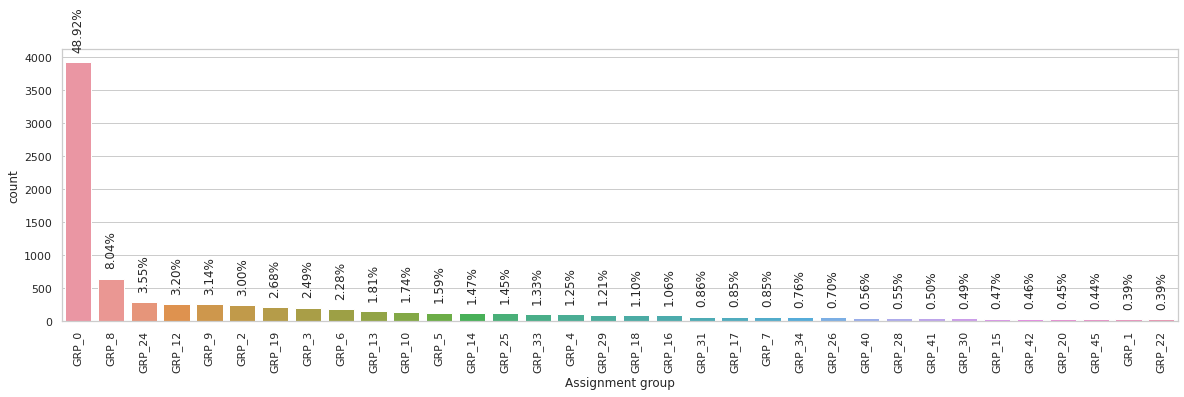

In [115]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=df_incidents, order=df_incidents["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(df_incidents.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')

##### Lets view the top 20 Assignment groups with highest number of tickets¶

In [116]:
df_top_20 = df_incidents['Assignment group'].value_counts().nlargest(20).reset_index()
df_top_20

,index,Assignment group
0,GRP_0,3926
1,GRP_8,645
2,GRP_24,285
3,GRP_12,257
4,GRP_9,252
5,GRP_2,241
6,GRP_19,215
7,GRP_3,200
8,GRP_6,183
9,GRP_13,145


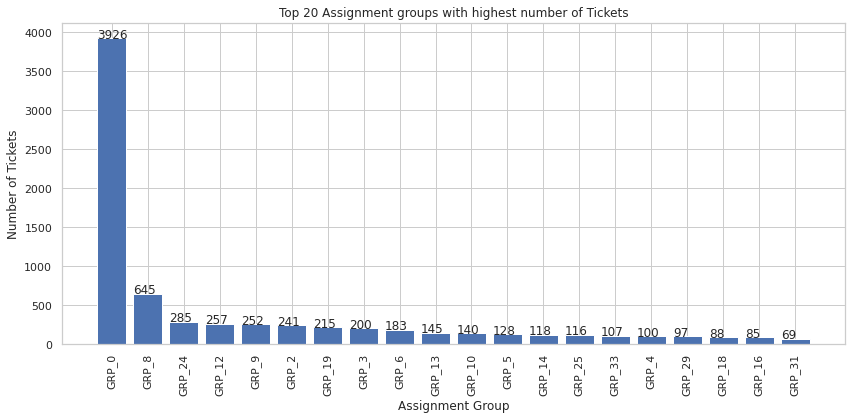

In [117]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_top_20['index'],df_top_20['Assignment group'])
plt.title('Top 20 Assignment groups with highest number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

##### Lets view the bottom 20 Assignment groups with less number of tickets

In [118]:
df_bottom_20 = df_incidents['Assignment group'].value_counts().nsmallest(20).reset_index()
df_bottom_20

,index,Assignment group
0,GRP_1,31
1,GRP_22,31
2,GRP_45,35
3,GRP_20,36
4,GRP_42,37
5,GRP_15,38
6,GRP_30,39
7,GRP_41,40
8,GRP_28,44
9,GRP_40,45


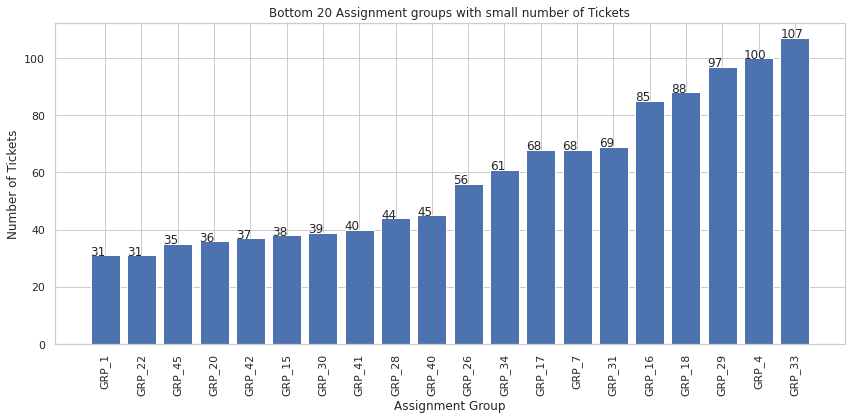

In [119]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_bottom_20['index'],df_bottom_20['Assignment group'])
plt.title('Bottom 20 Assignment groups with small number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

##### Distribution of tickets based on ticket count

In [120]:
df_bins = pd.DataFrame(columns=['Description','Ticket Count'])
one_ticket = {'Description':'1 ticket','Ticket Count':len(df_inc[df_inc['Assignment group'] < 2])}
_2_5_ticket = {'Description':'2-5 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 1)& (df_inc['Assignment group'] < 6) ])}
_10_ticket = {'Description':' 6-10 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 5)& (df_inc['Assignment group'] < 11)])}
_10_20_ticket = {'Description':' 11-20 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 10)& (df_inc['Assignment group'] < 21)])}
_20_50_ticket = {'Description':' 21-50 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 20)& (df_inc['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 50)& (df_inc['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 100)])}
#append row to the dataframe
df_bins = df_bins.append([one_ticket,_2_5_ticket,_10_ticket,
                          _10_20_ticket,_20_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_bins

,Description,Ticket Count
0,1 ticket,0
1,2-5 ticket,0
2,6-10 ticket,0
3,11-20 ticket,0
4,21-50 ticket,10
5,51-100 ticket,9
6,>100 ticket,15


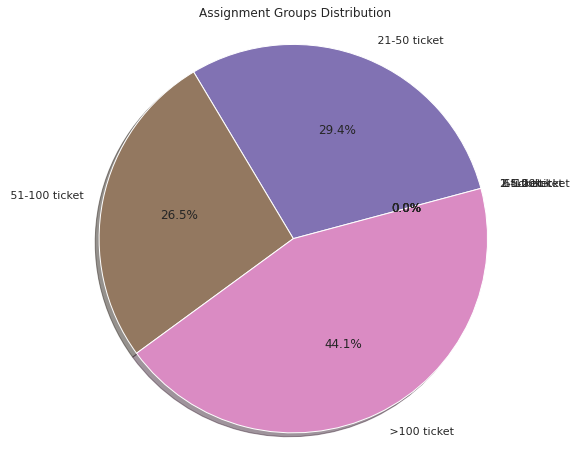

In [121]:
plt.figure(figsize=(10, 8))
plt.pie(df_bins['Ticket Count'],labels=df_bins['Description'],autopct='%1.1f%%', startangle=15, shadow = True);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

**Observation:**
* There are 15 Assignment group’s which have more than 100 tickets.
* Around 44% of the Assignment groups have greater than 100 tickets.

##### Derive insights on ticket distribution by L1/L2 and L3 Queues

In [122]:
df_incidents_level = df_incidents.copy()
df_incidents_level['Target'] = np.where(df_incidents_level['Assignment group']=='GRP_0','L1/L2',np.where(df_incidents_level['Assignment group'] =='GRP_8','L1/L2','L3'))

Text(0, 0.5, 'samples')

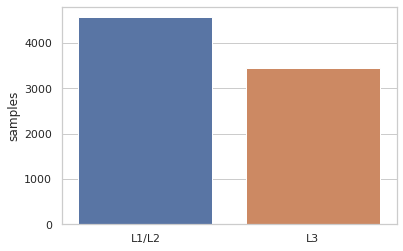

In [123]:
x=df_incidents_level.Target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

Characters in Short description by L1/L2 and L3

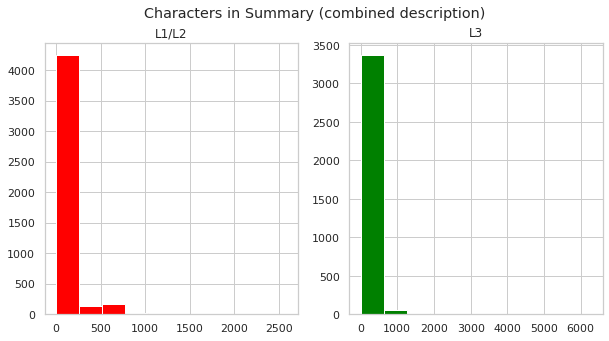

In [124]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Target']=='L1/L2']['Summary'].str.len()
ax1.hist(text_len.dropna(),color='red')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Target']=='L3']['Summary'].str.len()
ax2.hist(text_len.dropna(),color='green')
ax2.set_title('L3')
fig.suptitle('Characters in Summary (combined description)')
plt.show()

Words in Short description by L1/L2 and L3

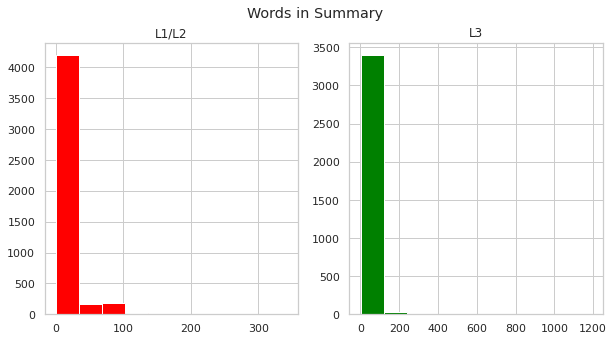

In [125]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Target']=='L1/L2']['Summary'].str.split().map(lambda x: len(str(x).split(" ")))
ax1.hist(text_len.dropna(),color='red')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Target']=='L3']['Summary'].str.split().map(lambda x: len(str(x).split(" ")))
ax2.hist(text_len.dropna(),color='green')
ax2.set_title('L3')
fig.suptitle('Words in Summary')
plt.show()

##### WordCloud

In [126]:
def f_word_cloud(column):
    
    comment_words = ' '
    stopwords = set(STOPWORDS)

    # iterate through the csv file 
    for val in column: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 
    
    return wordcloud

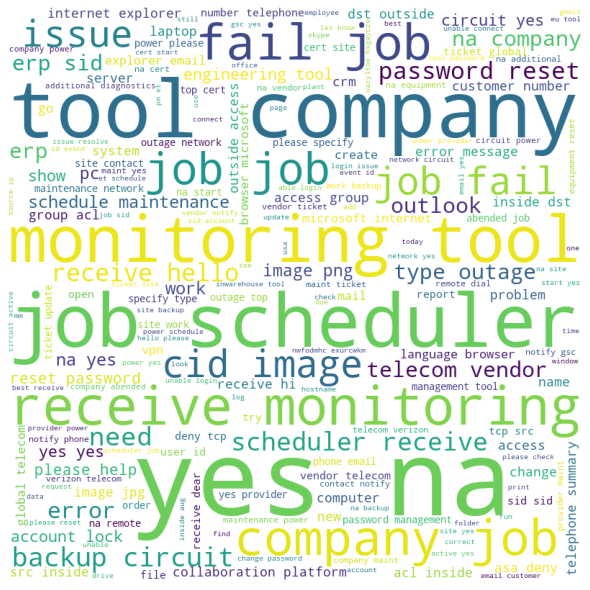

In [127]:
from wordcloud import WordCloud, STOPWORDS 


wordcloud = f_word_cloud(df_incidents.Summary)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Word Cloud for tickets with Assignment group 'GRP_0'

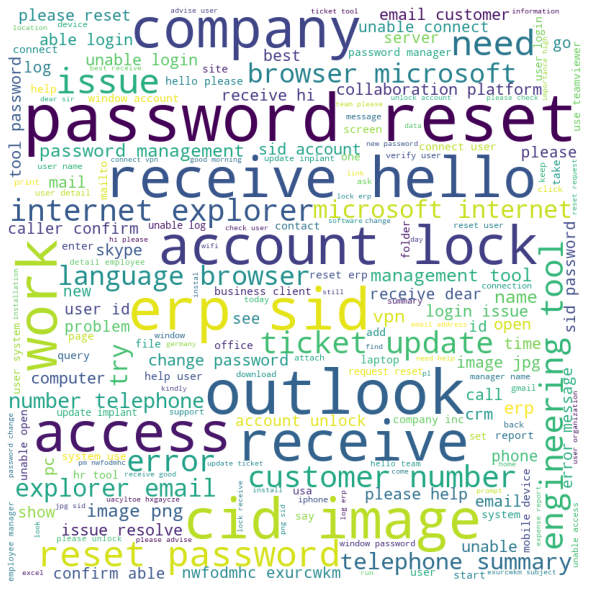

In [128]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_0'].Summary)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

**Observation:** GRP_0 seems to have tickets related to password reset, access issues , login issue, connectivity issue etc.

Word Cloud for tickets with Assignment group 'GRP_8'

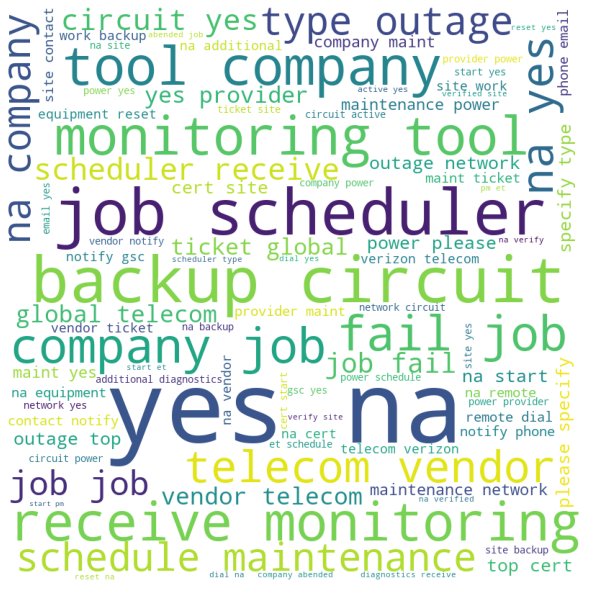

In [129]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_8'].Summary)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

**Observation:** GRP_8 seems to have tickets related to outage, job failures, monitoring tool etc

Word Cloud for tickets with Assignment group 'GRP_12'

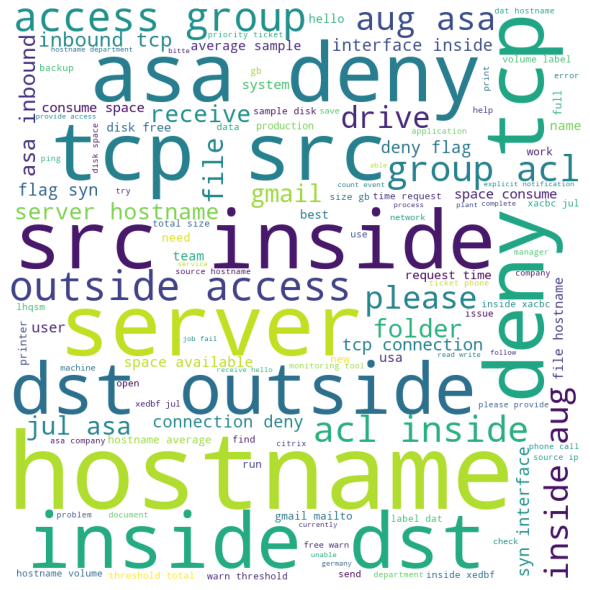

In [130]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_12'].Summary)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

**Observation:** GRP_12 contains tickets related to systems like disk space issues, network issues like tie out, citrix issue, connectivity timeout etc.

Word Cloud for tickets with Assignment group 'GRP_24'

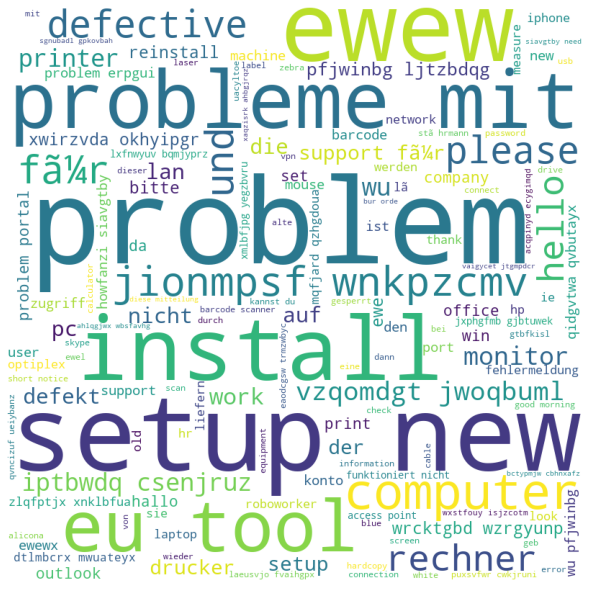

In [131]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_24'].Summary)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

**Observation:** GRP_24 - Tickets are mainly in german, these tickets were translated to english before passing it to our model.

### Topic Modeling
We need to convert our text into numbers or vectors. So following methods are used

In [132]:
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator

##### Count Vectorizer
The CountVectorizer method of vectorizing tokens transposes all the words/tokens into features and then provides a count of occurrence of each word. The result is called a document term matrix

In [136]:
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
tf = tf_vectorizer.fit_transform(df_incidents_level['Summary'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

,abended,able,accept,access,account,action,activate,activation,active,activity,ad,add,additional,address,admin,administrator,advise,aerp,affect,agent,alert,allow,already,also,alternate,analysis,another,ap,apac,app,appear,application,approval,approve,area,asa,ask,assign,assist,assistance,...,value,vendor,verified,verify,verizon,version,via,view,vip,visitor,volume,von,vpn,want,warehouse,warm,warn,way,web,website,wednesday,week,welcome,well,wifi,win,window,windows,wireless,within,without,work,workflow,would,write,wrong,yes,yesterday,æ³,æœ
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8021,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8022,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8024,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### LDA Topic Modelling
Now that we have prepared our data for topic modeling, we’ll be using the Latent Dirichlet Allocation (LDA) approach to determine the topics present in our corpus. In our model, we are going to produce 10 individual topics (ie. n_components). Once the model is created let’s create a function to display the identified topics. Each topic will consist of 10 words. The function will have three required parameters; the LDA model, feature names from the document term matrix, and the number of words per topic.

In [137]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=500, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
printer number summary microsoft name customer email file print group
Topic 1:
erp sid issue report system user error production work tool
Topic 2:
password user reset account login tool lock change window unlock
Topic 3:
outlook unable request call connect work skype phone issue computer
Topic 4:
ticket hostname update server device connection agent block port alert
Topic 5:
job yes na company monitoring receive scheduler tool fail com
Topic 6:
access id tcp vpn asa ip name via user information
Topic 7:
send please pc order plant check subject issue screen pm
Topic 8:
company com tool gmail usa engineering deny access go mailto
Topic 9:
receive please hello get image event cid error help message


Topics produced via LDA are - 
* Topic 0 - Printer 
* Topic 1 - User Account
* Topic 2 - Password Reset 
* Topic 3 - Outlook, Skype
* Topic 4 - Server
* Topic 5 - Scheduler
* Topic 6 - Port
* Topic 7 - ?
* Topic 8 - ?
* Topic 9 - ?

In [141]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
5      32.420952   8.115230       1        1  21.293041
9       0.648955  71.707100       2        1  19.766389
0      71.019684   9.971006       3        1   9.934692
7       3.785981  33.185135       4        1   9.733734
2     -42.666500  -9.222070       5        1   9.086176
8      -3.621689 -43.526516       6        1   7.023801
1      -3.632402  -4.171708       7        1   6.141518
6     -36.584400  35.804413       8        1   5.893934
4      44.391380  50.615383       9        1   5.713957
3      40.235809 -31.591665      10        1   5.412758, topic_info=         Term         Freq        Total Category  logprob  loglift
300       job  2421.000000  2421.000000  Default  30.0000  30.0000
408  password  1379.000000  1379.000000  Default  29.0000  29.0000
92    company  2292.000000  2292.000000  Default  28.0000  28.0000
185       erp  1169.000000  1169.000000  Default  27.0000  27.0000
651       yes  1982.000000  1982.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
89       come    54.756064   101.100035  Topic10  -4.6602   2.3032
176     email   117.635392   820.566791  Topic10  -3.8955   0.9740
588      time    73.235464   395.296051  Topic10  -4.3694   1.2305
244      good    49.219112   125.328593  Topic10  -4.7668   1.9818
334      mail    50.694556   196.480029  Topic10  -4.7373   1.5617

[472 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.992326  abended
1         2  0.351155     able
1         3  0.150495     able
1         5  0.496076     able
3         6  0.223178   access
...     ...       ...      ...
646       7  0.191272     work
646      10  0.351291     work
648       2  0.928220    would
648       4  0.069459    would
651       1  0.999389      yes

[602 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 10, 1, 8, 3, 9, 2, 7, 5, 4])

##### TF-IDF 
LDA isn’t the only approach to topic modeling. Let’s try another method named the Non-Negative Matrix Factorization (NMF) approach and see if our topics can be slightly more defined. Instead of using the simple CountVectorizer method to vectorize our words/tokens, we’ll use the TF-IDF (Term Frequency — Inverse Document Frequency) method. The TF-IDF method helps to bring down the weight/impact of high-frequency words.

In [138]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df =25, max_features=5000, use_idf=True)
tfidf = tfidf_vectorizer.fit_transform(df_incidents_level['Summary'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))
doc_term_matrix_tfidf

,abended,able,accept,access,account,action,activate,activation,active,activity,ad,add,additional,address,admin,administrator,advise,aerp,affect,agent,alert,allow,already,also,alternate,analysis,another,ap,apac,app,appear,application,approval,approve,area,asa,ask,assign,assist,assistance,...,value,vendor,verified,verify,verizon,version,via,view,vip,visitor,volume,von,vpn,want,warehouse,warm,warn,way,web,website,wednesday,week,welcome,well,wifi,win,window,windows,wireless,within,without,work,workflow,would,write,wrong,yes,yesterday,æ³,æœ
0,0.0,0.173727,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.219333,0.0,0.0,0.0,0.0,0.0,0.212105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.217235,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.249251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.280999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.519066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.38133,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8021,0.0,0.000000,0.0,0.00000,0.34631,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.291275,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8022,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.433429,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8023,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.436247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8024,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0

In [139]:
len(tfidf.todense())

8026

In [140]:
nmf = NMF(n_components=10, random_state=0, alpha=.1, init='nndsvd').fit(tfidf)
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
job scheduler monitoring com fail tool company receive abended sid
Topic 1:
password reset management request window change tool manager user please
Topic 2:
account lock window unlock ad get user expire check unlocked
Topic 3:
please receive user hello help image issue cid error access
Topic 4:
yes na circuit power site telecom vendor backup outage cert
Topic 5:
unable login connect skype vpn engineering tool log collaboration platform
Topic 6:
ticket update implant inplant inc printer driver query call print
Topic 7:
erp sid unlock user reset system production log account issue
Topic 8:
internet explorer summary browser email number telephone microsoft customer language
Topic 9:
outlook crm issue open work launch load email respond unable


Topics produced via NMF are - 
* Topic 0 - Scheduler 
* Topic 1 - Password Reset
* Topic 2 - Account lock 
* Topic 3 - ?
* Topic 4 - Power Outage
* Topic 5 - Mail/Skype
* Topic 6 - Printer
* Topic 7 - User account
* Topic 8 - Browser
* Topic 9 - Outlook

The topics produced via NMF seem to be much more distinct compared to LDA.

Let’s add both the LDA and NMF topics into our dataframe for further analysis. Let’s also remap the integer topics into our subjectively derived topic labels.

In [142]:
nmf_topic_values = nmf.transform(tfidf)
df_incidents_level['nmf_topics'] = nmf_topic_values.argmax(axis=1)
lda_topic_values = lda_model.transform(tf)
df_incidents_level['lda_topics'] = lda_topic_values.argmax(axis=1)
lda_remap = {0: 'Printer', 1: 'User Account', 2: 'Password Reset', 3: 'Mail/Skype', 
             4: 'Server', 5: 'Scheduler', 6: 'Port', 
             7: 'Unknown1', 8: 'Unknown2', 9: 'Unknown3'}
df_incidents_level['lda_topics'] = df_incidents_level['lda_topics'].map(lda_remap)
nmf_remap = {0: 'Scheduler', 1: 'Password Reset', 2: 'Account Lock', 3: 'Unknown', 
             4: 'Power Outage', 5: 'Mail/Skype', 6: 'Printer', 7: 'User Account', 
             8: 'Browser', 9: 'Outlook'}
df_incidents_level['nmf_topics'] = df_incidents_level['nmf_topics'].map(nmf_remap)

##### Plot the top most reasons for raising a ticket

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text major ticklabel objects>)

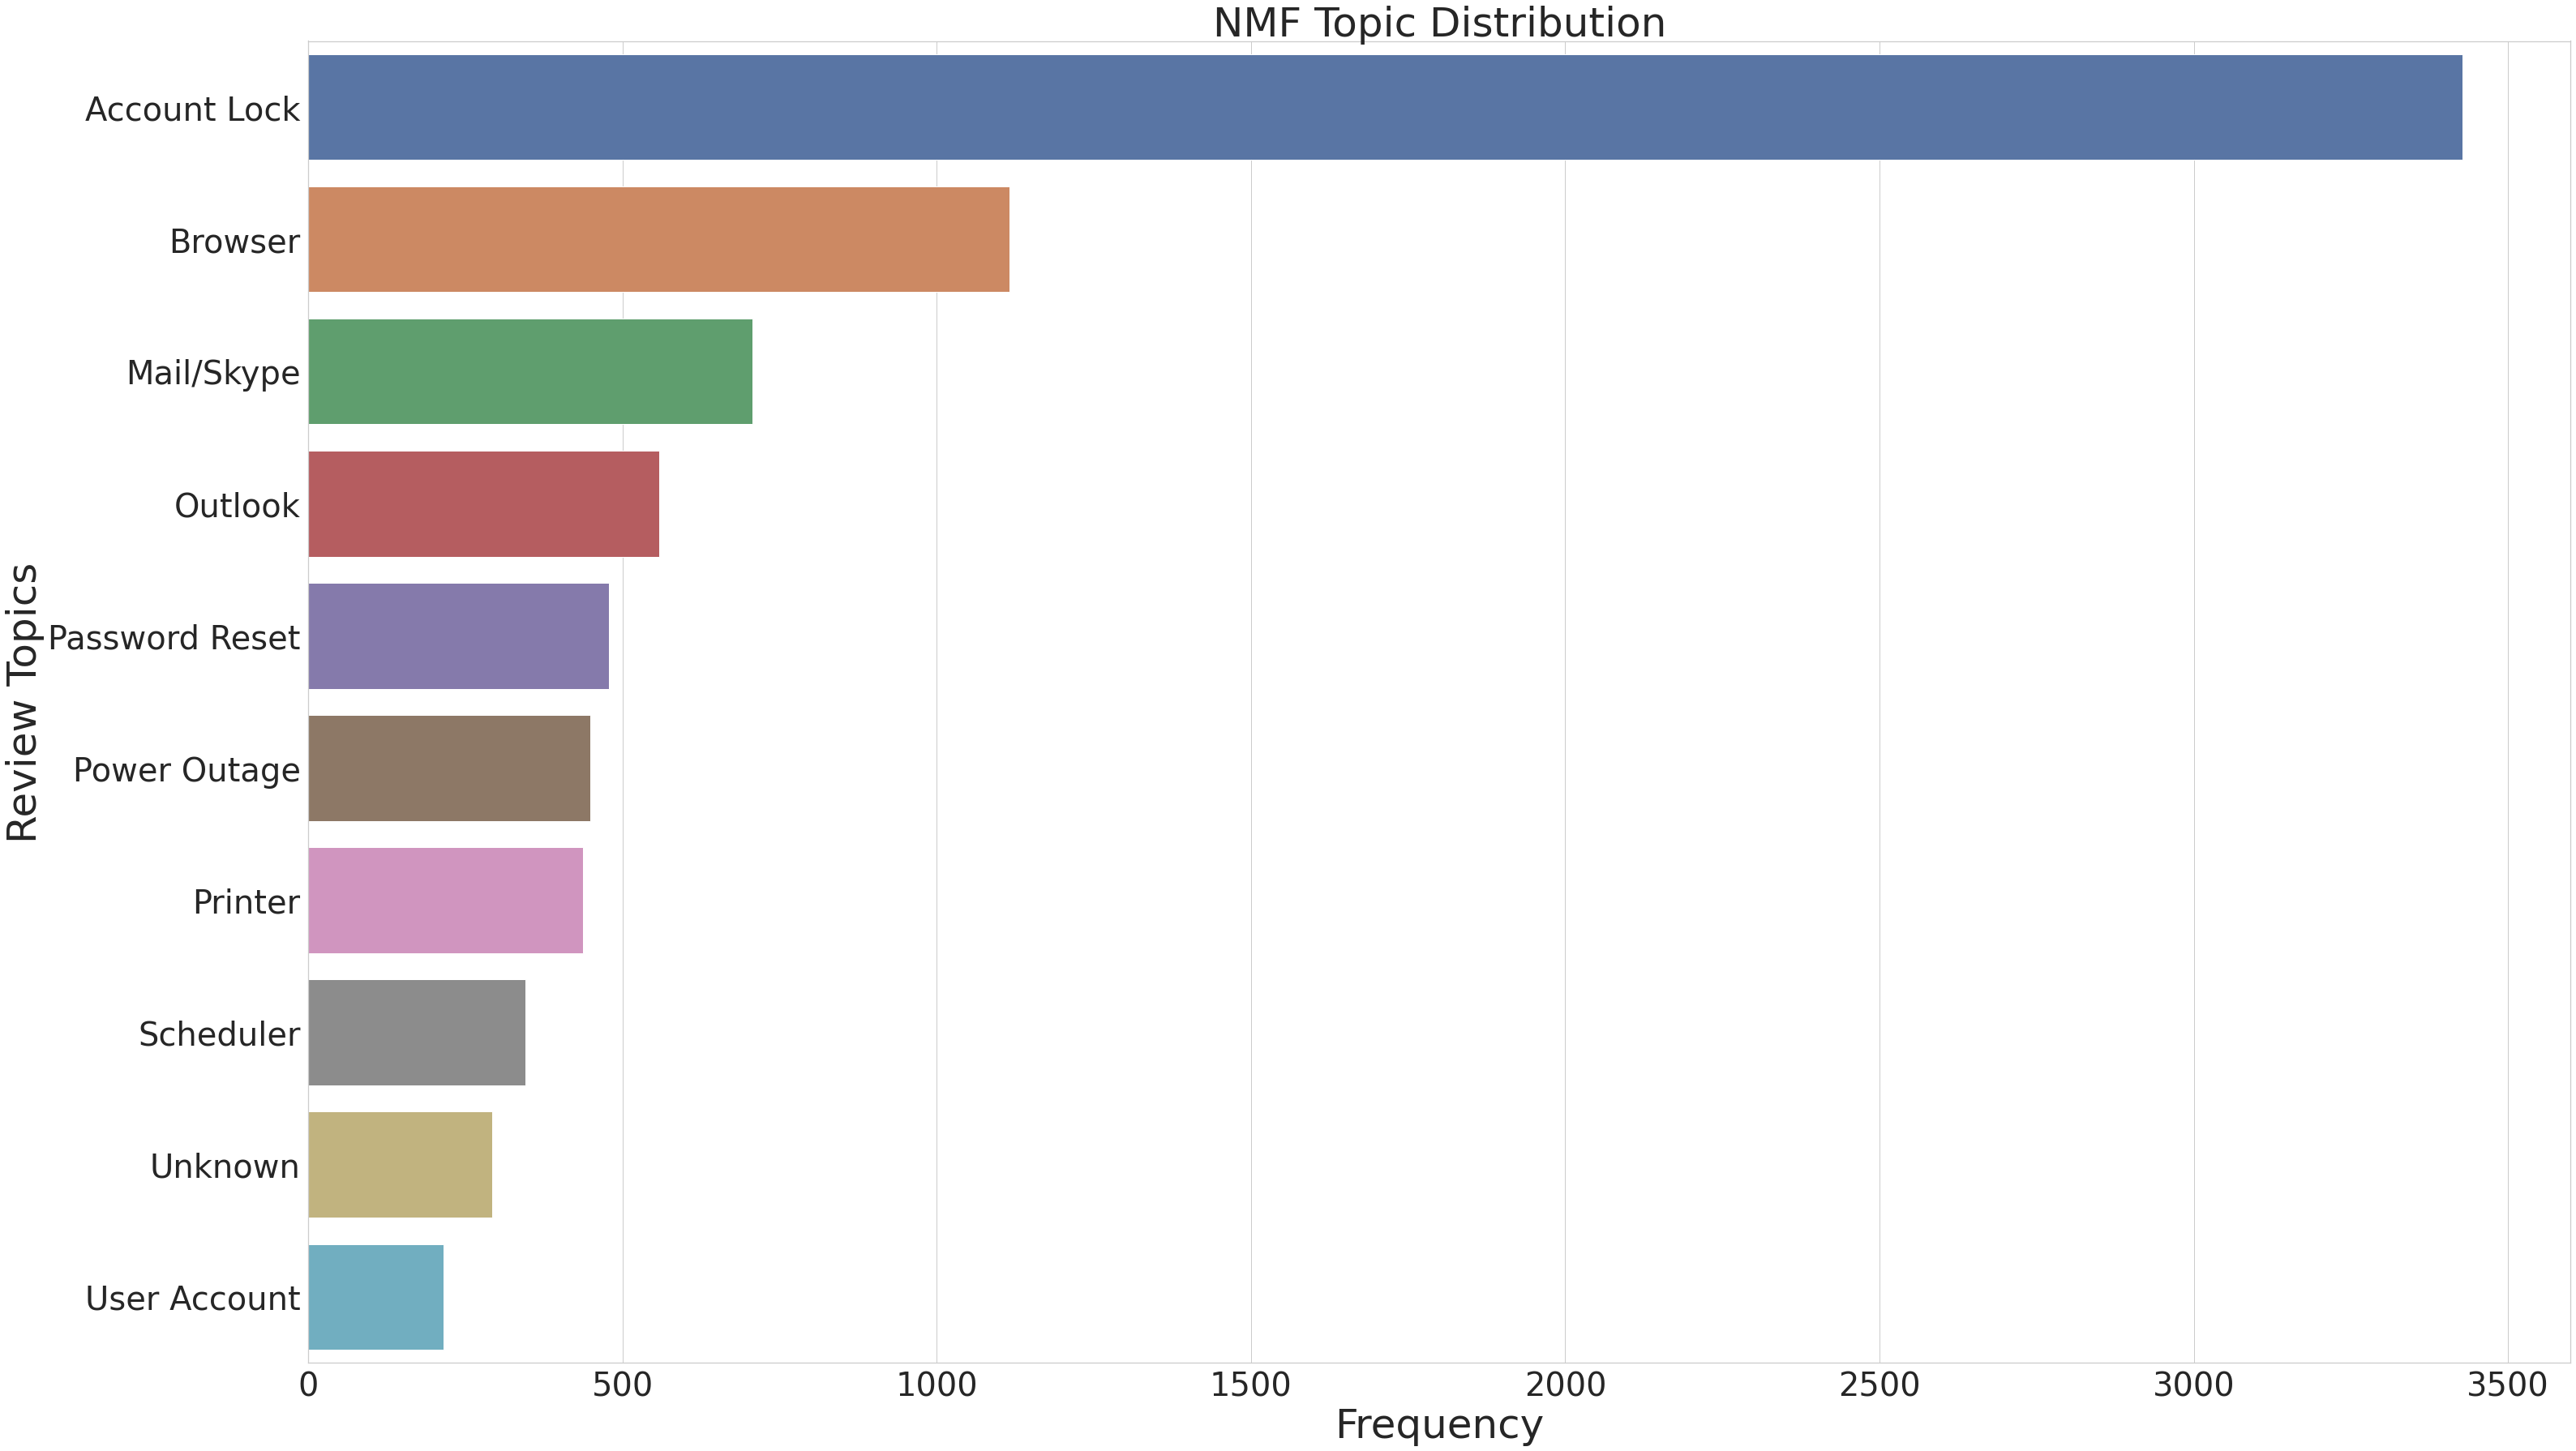

In [143]:
nmf_x = df_incidents_level['nmf_topics'].value_counts()
nmf_y = nmf_x.sort_index()
plt.figure(figsize=(20,10))
sns.barplot(nmf_x, nmf_y.index)
plt.title("NMF Topic Distribution", fontsize=30)
plt.ylabel('Review Topics', fontsize=20)
plt.yticks(fontsize=10)
plt.xlabel('Frequency', fontsize=20)
plt.xticks(fontsize=10)

#### Try and see if the data could be clustered

#### Dimensionality Reduction using t-SNE

In [144]:
from sklearn.decomposition import TruncatedSVD

n_comp=10
svd = TruncatedSVD(n_components=n_comp, random_state=42)
svd_tfidf = svd.fit_transform(tfidf)

In [145]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=42, n_iter=500)
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8026 samples in 0.019s...
[t-SNE] Computed neighbors for 8026 samples in 0.796s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8026
[t-SNE] Computed conditional probabilities for sample 2000 / 8026
[t-SNE] Computed conditional probabilities for sample 3000 / 8026
[t-SNE] Computed conditional probabilities for sample 4000 / 8026
[t-SNE] Computed conditional probabilities for sample 5000 / 8026
[t-SNE] Computed conditional probabilities for sample 6000 / 8026
[t-SNE] Computed conditional probabilities for sample 7000 / 8026
[t-SNE] Computed conditional probabilities for sample 8000 / 8026
[t-SNE] Computed conditional probabilities for sample 8026 / 8026
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.970016
[t-SNE] KL divergence after 500 iterations: 1.082497


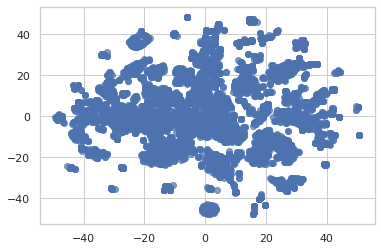

In [146]:
tfidf_df = pd.DataFrame(tsne_tfidf, columns=['x', 'y'])
plt.scatter(tfidf_df.x, tfidf_df.y, alpha=0.7)

**Observation:**
We can see there are multiple smaller clusters here, each cluster could be the type of tickets that we have in the dataset.

##### Clustering using Agglomerative Clustering

In [ ]:
# Model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [ ]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
model.fit(inc_clus['embedding'].values.tolist())

In [ ]:
plt.figure(figsize=(30, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
Z = linkage(inc_clus['embedding'].values.tolist(), metric='euclidean', method='average')
dendrogram(Z, leaf_rotation=90, color_threshold=40, leaf_font_size=8)
plt.tight_layout()

### Model Building

Since the dataset is very imbalanced, we will be considering a subset of groups for predictions. In 74 groups, 46% of tickets belong to group 1 and 16 groups have more than 100 tickets and around 22 groups have more than 50 tickets, rest of the Assignment groups have very less ticket counts which might not add much value to the model prediction. If we conducted random sampling towards all the subcategories, then we would face a problem that we might miss all the tickets in some categories. Hence, we considered the groups that have more than 50 tickets in this appoach

Let's proceed towards trying different model architectures mentioned below to classify the problem and validate which one is outperforming.

* Multinomial Naive Bayes
* K Nearest neighbor
* Support Vector Machine
* Decission Tree
* Random Forest
* Deep Neural Network
* Convolutional Neural Network
* Recurrent Neural Network
* Recurrent Convolutional Neural Network
* RNN with LSTM

Let's create another column of categorical datatype from Assignment groups. Let's write some generic methods for utilities and to plot evaluation metrics.

In [9]:
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier


from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [10]:
df_incidents_level = df_incidents_level[df_incidents_level['Assignment group'].map(df_incidents_level['Assignment group'].value_counts()) > 50]
x = df_incidents_level['Summary']
y = df_incidents_level['Assignment group']

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# encoding train labels 
encoder.fit(y)
y = encoder.transform(y)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13,stratify=y)

from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights

w_array = np.ones(y_train.shape[0], dtype = 'float')
for i, val in enumerate(y_train):
    w_array[i] = class_weights[val]
    
    
log_cols=["Classifier", "accuracy","f1_score"]
log1 = pd.DataFrame(columns=log_cols)

NameError: ignored

In [149]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

**Multinomial Naive Bayes**

In [150]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

predictions = nb.predict_proba(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test)) 
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
print ("logloss: %0.3f " % multiclass_logloss(y_test,predictions))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))


log_entry = pd.DataFrame([["MultinomialNB",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log1 = log1.append(log_entry)

accuracy 0.6078431372549019
f1 score 0.7414947054090453
logloss: 1.897 
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       785
           1       0.00      0.00      0.00        28
           2       1.00      0.22      0.35        51
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        24
           5       0.00      0.00      0.00        17
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        43
           9       1.00      0.02      0.04        48
          10       1.00      0.23      0.37        57
          11       0.00      0.00      0.00        23
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00        19
          14       0.00      0.00      0.00        40
          15       0.00      0.00      0.00        14
         

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Linear SVC**

In [153]:
from sklearn.svm import LinearSVC

svc = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', OneVsRestClassifier(LinearSVC(loss='hinge',random_state=42,class_weight='balanced'))),
               ])
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 


print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))
log_entry = pd.DataFrame([["LinearSVC",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log1 = log1.append(log_entry)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


accuracy 0.703921568627451
f1 score 0.7093958254338417
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       785
           1       0.71      0.61      0.65        28
           2       0.64      0.59      0.61        51
           3       0.63      0.59      0.61        29
           4       0.41      0.29      0.34        24
           5       0.42      0.29      0.34        17
           6       0.21      0.64      0.32        14
           7       0.54      0.39      0.45        18
           8       0.36      0.40      0.38        43
           9       0.51      0.58      0.54        48
          10       0.87      0.72      0.79        57
          11       0.54      0.30      0.39        23
          12       0.25      0.18      0.21        11
          13       0.56      0.47      0.51        19
          14       0.42      0.45      0.43        40
          15       0.67      0.57      0.62        14
          16       0.46   

**SGD Classifier**

In [154]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=100, tol=None,class_weight='balanced')),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 


print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["SGDClassifier",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log1 = log1.append(log_entry)

accuracy 0.5928104575163399
f1 score 0.5627604943935512
              precision    recall  f1-score   support

           0       0.92      0.65      0.76       785
           1       0.57      0.57      0.57        28
           2       0.52      0.57      0.54        51
           3       0.50      0.66      0.57        29
           4       0.31      0.50      0.38        24
           5       0.20      0.47      0.28        17
           6       0.43      0.64      0.51        14
           7       0.27      0.67      0.38        18
           8       0.37      0.30      0.33        43
           9       0.52      0.52      0.52        48
          10       0.72      0.74      0.73        57
          11       0.31      0.52      0.39        23
          12       0.14      0.55      0.22        11
          13       0.39      0.68      0.50        19
          14       0.41      0.40      0.41        40
          15       0.33      0.71      0.45        14
          16       0.29  

**Logistic Regression**

In [8]:
from sklearn.linear_model import LogisticRegression

logreg_1 = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5,class_weight='balanced')),
               ])
logreg_1.fit(X_train, y_train)

y_pred = logreg_1.predict(X_test)
predictions = logreg_1.predict_proba(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
print ("logloss: %0.3f " % multiclass_logloss(y_test,predictions))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

#log_entry = pd.DataFrame([["LogisticRegression",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
#log1 = log1.append(log_entry)

NameError: ignored

In [156]:
log1.set_index(["Classifier"],inplace=True)
log1.sort_values(by=['f1_score'])

,accuracy,f1_score
Classifier,,
SGDClassifier,0.592810,0.562760
LogisticRegression,0.679739,0.679988
LinearSVC,0.703922,0.709396
MultinomialNB,0.607843,0.741495


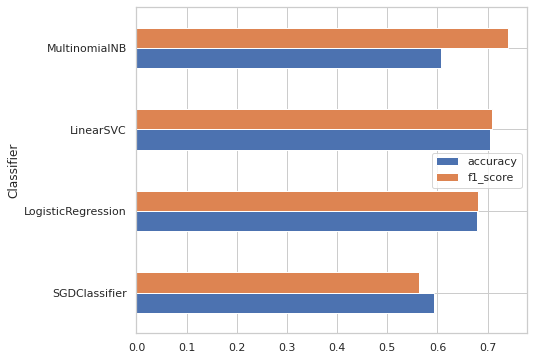

In [157]:
log1.sort_values(by=['f1_score']).plot(kind='barh',figsize=[7,6])

**Observation:** Multinomial NB and Linear SVC have better performance.

In [158]:
### Save the model
from sklearn.externals import joblib
joblib.dump(svc, 'ML_algorithm_classification.pkl', compress=1)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['ML_algorithm_classification.pkl']

### Hyperparameter Tuning
Let's tune each of the models using GridsearchCV to identify the best parameters

**Linear SVC**

In [159]:
from sklearn.model_selection import GridSearchCV

params = {"clf__estimator__C": [0.1, 1, 10, 100, 1000],  
              'clf__estimator__loss': ['hinge','squared_hinge'],}  
  
clf_svc = GridSearchCV(svc, param_grid=params, refit = True, verbose = 1,scoring='f1_weighted') 
# fitting the model for grid search 
clf_svc.fit(X_train, y_train)

print("Best Score: ", clf_svc.best_score_)
print("Best Params: ", clf_svc.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, 

Best Score:  0.6819964299108314
Best Params:  {'clf__estimator__C': 1, 'clf__estimator__loss': 'squared_hinge'}


In [161]:
y_pred = clf_svc.best_estimator_.predict(X_test)
#predictions = clf_svc.best_estimator_.predict_proba(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
#print ("logloss: %0.3f " % multiclass_logloss(y_test,predictions))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["LinearSVC_best_estimator",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols,index=['LinearSVC_best_estimator'])
log1 = log1.append(log_entry)

accuracy 0.6882352941176471
f1 score 0.687242719749123
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       785
           1       0.74      0.61      0.67        28
           2       0.58      0.57      0.57        51
           3       0.63      0.59      0.61        29
           4       0.53      0.42      0.47        24
           5       0.50      0.35      0.41        17
           6       0.24      0.64      0.35        14
           7       0.54      0.39      0.45        18
           8       0.26      0.28      0.27        43
           9       0.49      0.56      0.52        48
          10       0.87      0.72      0.79        57
          11       0.50      0.30      0.38        23
          12       0.33      0.18      0.24        11
          13       0.56      0.53      0.54        19
          14       0.41      0.42      0.42        40
          15       0.62      0.57      0.59        14
          16       0.40   

**SGD Classifier**

In [162]:
params = {
    "clf__loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "clf__alpha" : [0.0001, 0.001, 0.01, 0.1],
    "clf__penalty" : ["l2", "l1", "none"],
}

clf_sgd = GridSearchCV(sgd, param_grid=params,refit = True, verbose = 1,scoring='f1_weighted')
clf_sgd.fit(X_train, y_train)

print("Best Score: ", clf_sgd.best_score_)
print("Best Params: ", clf_sgd.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  7.1min finished


Best Score:  0.6801536489461419
Best Params:  {'clf__alpha': 0.0001, 'clf__loss': 'log', 'clf__penalty': 'none'}


In [163]:
y_pred = clf_sgd.best_estimator_.predict(X_test)
#predictions = clf_svc.best_estimator_.predict_proba(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
#print ("logloss: %0.3f " % multiclass_logloss(y_test,predictions))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["SGD_best_estimator",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols,index=['SGD_best_estimator'])
log1 = log1.append(log_entry)

accuracy 0.6869281045751634
f1 score 0.6803222928588626
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       785
           1       0.76      0.57      0.65        28
           2       0.58      0.59      0.58        51
           3       0.70      0.66      0.68        29
           4       0.46      0.46      0.46        24
           5       0.29      0.29      0.29        17
           6       0.38      0.71      0.50        14
           7       0.53      0.44      0.48        18
           8       0.33      0.33      0.33        43
           9       0.54      0.58      0.56        48
          10       0.81      0.75      0.78        57
          11       0.48      0.43      0.45        23
          12       0.29      0.36      0.32        11
          13       0.45      0.53      0.49        19
          14       0.43      0.50      0.46        40
          15       0.56      0.71      0.63        14
          16       0.36  

**Logistic Regression**

In [7]:
params = {
  'clf__penalty': ['l2'],
  'clf__C': [1e-4, 1e4],
  'clf__max_iter': [100,4000,5000],
}

clf_lr = GridSearchCV(logreg_1, param_grid=params, refit = True,verbose = 1,scoring='f1_weighted')
clf_lr.fit(X_train, y_train)

print("Best Score: ", clf_lr.best_score_)
print("Best Params: ", clf_lr.best_params_)

NameError: ignored

In [1]:
y_pred = clf_lr.best_estimator_.predict(X_test)
#predictions = clf_svc.best_estimator_.predict_proba(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
#print ("logloss: %0.3f " % multiclass_logloss(y_test,predictions))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["LogisticRegression_best_estimator",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols,index=['LogisticRegression_best_estimator'])
log1 = log1.append(log_entry)

NameError: ignored

In [ ]:
log1.sort_values(by=['f1_score'])

In [ ]:
log1.sort_values(by=['f1_score']).plot(kind='barh',figsize=[7,6])

#### Neural Network

In [ ]:
#Path where you want to save the weights, model and checkpoints
model_path = "Weights/"
%mkdir Weights

# Define model callbacks
def call_backs(name):
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=100)
    model_checkpoint =  ModelCheckpoint(model_path + name + '_epoch{epoch:02d}_loss{val_loss:.4f}.h5',
                                                               monitor='val_loss',
                                                               verbose=1,
                                                               save_best_only=True,
                                                               save_weights_only=False,
                                                               mode='min',
                                                               period=1)
    return [model_checkpoint, early_stopping]

In [ ]:
# Function to build Deep NN
def Build_Model_DNN_Text(shape, nClasses, dropout=0.3):
    """
    buildModel_DNN_Tex(shape, nClasses,dropout)
    Build Deep neural networks Model for text classification
    Shape is input feature space
    nClasses is number of classes
    """
    model = Sequential()
    node = 512 # number of nodes
    nLayers = 4 # number of  hidden layer
    model.add(Dense(node,input_dim=shape,activation='relu'))
    model.add(Dropout(dropout))
    for i in range(0,nLayers):
        model.add(Dense(node,input_dim=node,activation='relu'))
        model.add(Dropout(dropout))
        model.add(BatchNormalization())
    model.add(Dense(nClasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    print(model.summary())
    return model

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(ticket.Summary)
X_train_tfidf = Tfidf_vect.transform(X_train)
X_test_tfidf = Tfidf_vect.transform(X_test)

# Instantiate the network
model_DNN = Build_Model_DNN_Text(X_train_tfidf.shape[1], 75)

In [ ]:
model_DNN.fit(X_train_tfidf, y_train,
                              validation_data=(X_test_tfidf, y_test),
                              callbacks=call_backs("NN"),
                              epochs=10,
                              batch_size=128,
                              verbose=2)
predicted = model_DNN.predict(X_test_tfidf)

##### Extract Glove Embeddings

In [ ]:
# Check if it is already extracted else Open the zipped file as readonly
if not os.path.isfile('glove.6B/glove.6B.100d.txt'):
    glove_embeddings = 'glove.6B.zip'
    with ZipFile(glove_embeddings, 'r') as archive:
        archive.extractall('glove.6B')

# List the files under extracted folder
os.listdir('glove.6B')

In [ ]:
gloveFileName = 'glove.6B/glove.6B.200d.txt'
MAX_SEQUENCE_LENGTH = 500
EMBEDDING_DIM=200
MAX_NB_WORDS=75000

# Function to generate Embedding
def loadData_Tokenizer(X_train, X_test,filename):
    np.random.seed(7)
    text = np.concatenate((X_train, X_test), axis=0)
    text = np.array(text)
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index
    text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('Found %s unique tokens.' % len(word_index))
    indices = np.arange(text.shape[0])
    # np.random.shuffle(indices)
    text = text[indices]
    print(text.shape)
    X_train = text[0:len(X_train), ]
    X_test = text[len(X_train):, ]
    embeddings_index = {}
    f = open(filename, encoding="utf8")
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
        except:
            pass
        embeddings_index[word] = coefs
    f.close()
    print('Total %s word vectors.' % len(embeddings_index))
    return (X_train, X_test, word_index,embeddings_index)


embedding_matrix = []

def buildEmbed_matrices(word_index,embedding_dim):
    embedding_matrix = np.random.random((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) !=len(embedding_vector):
                print("could not broadcast input array from shape",str(len(embedding_matrix[i])), "into shape",str(len(embedding_vector)),
                      " Please make sure your"" EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [ ]:
# Generate Glove embedded datasets
X_train_Glove, X_test_Glove, word_index, embeddings_index = loadData_Tokenizer(X_train,X_test,gloveFileName)
embedding_matrix = buildEmbed_matrices(word_index,EMBEDDING_DIM)

In [ ]:
def Build_Model_CNN_Text(word_index, embeddings_matrix, nclasses,dropout=0.5):
    """
        def buildModel_CNN(word_index, embeddings_index, nclasses, MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=50, dropout=0.5):
        word_index in word index ,
        embeddings_index is embeddings index, look at data_helper.py
        nClasses is number of classes,
        MAX_SEQUENCE_LENGTH is maximum lenght of text sequences,
        EMBEDDING_DIM is an int value for dimention of word embedding look at data_helper.py
    """
    model = Sequential()
    embedding_layer = Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True)
    # applying a more complex convolutional approach
    convs = []
    filter_sizes = []
    layer = 5
    print("Filter  ",layer)
    for fl in range(0,layer):
        filter_sizes.append((fl+2))
    node = 128
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    for fsz in filter_sizes:
        l_conv = Conv1D(node, kernel_size=fsz, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(5)(l_conv)
        #l_pool = Dropout(0.25)(l_pool)
        convs.append(l_pool)
    l_merge = Concatenate(axis=1)(convs)
    l_cov1 = Conv1D(node, 5, activation='relu')(l_merge)
    l_cov1 = Dropout(dropout)(l_cov1)
    l_batch1 = BatchNormalization()(l_cov1)
    l_pool1 = MaxPooling1D(5)(l_batch1)
    l_cov2 = Conv1D(node, 5, activation='relu')(l_pool1)
    l_cov2 = Dropout(dropout)(l_cov2)
    l_batch2 = BatchNormalization()(l_cov2)
    l_pool2 = MaxPooling1D(30)(l_batch2)
    l_flat = Flatten()(l_pool2)
    l_dense = Dense(1024, activation='relu')(l_flat)
    l_dense = Dropout(dropout)(l_dense)
    l_dense = Dense(512, activation='relu')(l_dense)
    l_dense = Dropout(dropout)(l_dense)
    preds = Dense(nclasses, activation='softmax')(l_dense)
    model = Model(sequence_input, preds)
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    print(model.summary())
    return model

In [ ]:
# Train the network and run classification
model_CNN = Build_Model_CNN_Text(word_index,embedding_matrix, 75)
run_classification(model_CNN, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='CNN')